As mentioned in the description, this was a question received from a company with the only difference that I took it a little further into a logistic regression analysis and map visualization.


    To help us determine who would be able to fill this role with confidence we are asking our applicants to show  your ability to analyze and provide insight on data you may not have an immediate familiarity. Being a Healthc- are organization and in the midst of a Pandemic we would like you to provide correlations and insights between two dataset that are publicly available:

    Nursing Home COVID Data:

    https://data.cms.gov/Special-Programs-Initiatives-COVID-19-Nursing-Home/COVID-19-Nursing-Home-Dataset/s2uc-8wxp

    Nursing Home Star Comparisons (the star rating system is how the government assesses the overall quality of a  nursing home):

    https://data.medicare.gov/Nursing-Home-Compare/Star-Ratings/ax9d-vq6k

    Additional information behind these datasets can be found at their corresponding links.

    In general, we would like to see how the star rating of a facility reflects their ability to respond to the    COVID-19 Pandemic. Any insight you can provide regarding this correlation or any other interesting discoveries you make will help us in assessing your ability to excel in this role.

In [1]:
#Let's this analysis by import the necessary libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [2]:
#Let's import the nursing home data into the notebook and display it.
covid_data = pd.read_csv("COVID-19_Nursing_Home_Dataset.csv")
covid_data.head()

Week Ending Federal Provider Number  \
0  07/05/2020                  015035   
1  07/12/2020                  015109   
2  06/14/2020                  015149   
3  07/19/2020                  015214   
4  07/05/2020                  015375   

                                 Provider Name  \
0                            WEST GATE VILLAGE   
1  CIVIC CENTER HEALTH AND REHABILITATION, LLC   
2                                 SUNSET MANOR   
3                   MADISON MANOR NURSING HOME   
4           ANNISTON HEALTH AND REHAB SERVICES   

                     Provider Address Provider City Provider State  \
0  100 PINEVIEW AND THIRD P.O. BOX 49       BREWTON             AL   
1              1201 22ND STREET NORTH    BIRMINGHAM             AL   
2                    251 SUNSET PLACE          GUIN             AL   
3                    3891 SULLIVAN ST       MADISON             AL   
4                    600 E 8TH STREET      ANNISTON             AL   

   Provider Zip Code Submitted Data Passed Quality Assurance Check  \
0              36427              N                            NaN   
1              35234              N                            NaN   
2              35563              Y                              Y   
3              35758              N                            NaN   
4              36207              Y                              Y   

   Residents Weekly Admissions COVID-19  ...  \
0                                   0.0  ...   
1                                   0.0  ...   
2                                   0.0  ...   
3                                   0.0  ...   
4                                   0.0  ...   

   Number of Ventilators in Use for COVID-19  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   Any Current Supply of Ventilator Supplies  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   One-Week Supply of Ventilator Supplies  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   

   Total Resident Confirmed COVID-19 Cases Per 1,000 Residents  \
0                                              296.3             
1                                                0.0             
2                                                0.0             
3                                                0.0             
4                                                0.0             

   Total Resident COVID-19 Deaths Per 1,000 Residents  \
0                                                0.0    
1                                                0.0    
2                                                0.0    
3                                                0.0    
4                                                0.0    

   Total Residents COVID-19 Deaths as a Percentage of Confirmed COVID-19 Cases  \
0                                                0.0                             
1                                                NaN                             
2                                                NaN                             
3                                                NaN                             
4                                                NaN                             

      County  Three or More Confirmed and Suspected COVID-19 Cases This Week  \
0   Escambia                                                NaN                
1  Jefferson                                                NaN                
2

In [3]:
#From the dataframe, we can see that there are A LOT of columns or features.
#Let's start by dividing up the geolocation column into two separate columns for lat and lng without missing data.
glcn = covid_data[covid_data['Geolocation'].notnull()]['Geolocation'].str.split(pat='(').reset_index(drop=True)


lat_list = []
lng_list = []

for j in range(len(glcn)):
    lat_list.append(glcn[j][1].replace(')','').split()[0])
    lng_list.append(glcn[j][1].replace(')','').split()[1])

In [4]:
covid_data_loc = pd.concat([covid_data[covid_data['Geolocation'].notnull()].reset_index(drop=True),pd.DataFrame({'lat':lat_list}),pd.DataFrame({'lng':lng_list})],axis=1)
covid_data_loc.head()

Week Ending Federal Provider Number  \
0  07/12/2020                  015109   
1  06/14/2020                  015149   
2  07/19/2020                  015214   
3  07/19/2020                  015442   
4  05/24/2020                  015455   

                                 Provider Name            Provider Address  \
0  CIVIC CENTER HEALTH AND REHABILITATION, LLC      1201 22ND STREET NORTH   
1                                 SUNSET MANOR            251 SUNSET PLACE   
2                   MADISON MANOR NURSING HOME            3891 SULLIVAN ST   
3   ORCHARD REHABILITATION & HEALTHCARE CENTER  629 STATE HIGHWAY 21 SOUTH   
4                           MOUNT ROYAL TOWERS       300 ROYAL TOWER DRIVE   

  Provider City Provider State  Provider Zip Code Submitted Data  \
0    BIRMINGHAM             AL              35234              N   
1          GUIN             AL              35563              Y   
2       MADISON             AL              35758              N   
3    HAYNEVILLE             AL              36040              N   
4    BIRMINGHAM             AL              35209              N   

  Passed Quality Assurance Check  Residents Weekly Admissions COVID-19  ...  \
0                            NaN                                   0.0  ...   
1                              Y                                   0.0  ...   
2                            NaN                                   0.0  ...   
3                            NaN                                   0.0  ...   
4                            NaN                                   NaN  ...   

   One-Week Supply of Ventilator Supplies  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   

   Total Resident Confirmed COVID-19 Cases Per 1,000 Residents  \
0                                                0.0             
1                                                0.0             
2                                                0.0             
3                                               18.2             
4                                                NaN             

   Total Resident COVID-19 Deaths Per 1,000 Residents  \
0                                                0.0    
1                                                0.0    
2                                                0.0    
3                                               54.5    
4                                                NaN    

   Total Residents COVID-19 Deaths as a Percentage of Confirmed COVID-19 Cases  \
0                                                NaN                             
1                                                NaN                             
2                                                NaN                             
3                                              300.0                             
4                                                NaN                             

      County  Three or More Confirmed and Suspected COVID-19 Cases This Week  \
0  Jefferson                                                NaN                
1     Marion                                                  N                
2    Madison                                                NaN                
3    Lowndes                                                NaN                
4  Jefferson                                                NaN                

   Initial Confirmed COVID-19 Case This Week                   Geolocation  \
0                                        NaN  POINT (-86.811724 33.528778)   
1                                          N   POINT (-87.917408 33.96997)   
2                                        NaN  POINT (-86.751669 34.683955)   
3                                        NaN  POINT (-86.590764 32.178871)   
4                          

In [5]:
#So we have dealt with lat and lng's that have data, but what about those that don't have data?
#Since there are no coordinates, I dealt with them a different way.
#Let's temporarily place this dataframe subset into a new dataframe that we can work with.
covid_data_null_loc = covid_data[covid_data['Geolocation'].isnull()].drop_duplicates(subset=['Provider Name']).reset_index(drop=True)
covid_data_null_loc

Week Ending Federal Provider Number  \
0    07/05/2020                  015035   
1    07/05/2020                  015375   
2    07/19/2020                  025028   
3    06/21/2020                  025039   
4    06/07/2020                  035242   
..          ...                     ...   
812  06/14/2020                  676464   
813  06/14/2020                  676438   
814  06/14/2020                  676411   
815  06/14/2020                  676479   
816  05/31/2020                  676450   

                                         Provider Name  \
0                                    WEST GATE VILLAGE   
1                   ANNISTON HEALTH AND REHAB SERVICES   
2                            CORDOVA COMMUNITY MED LTC   
3                              MAPLE SPRINGS OF PALMER   
4                                  CHINLE NURSING HOME   
..                                                 ...   
812      LAS BRISAS REHABILITATION AND WELLNESS SUITES   
813                   KILLEEN NURSING & REHABILITATION   
814                             CLARENDON NURSING HOME   
815  RICHARD A. ANDERSON (STATE OF TEXAS VETERANS LAND   
816             TERRA BELLA HEALTH AND WELLNESS SUITES   

                       Provider Address Provider City Provider State  \
0    100 PINEVIEW AND THIRD P.O. BOX 49       BREWTON             AL   
1                      600 E 8TH STREET      ANNISTON             AL   
2                          P.O. BOX 160       CORDOVA             AK   
3          12130 EAST MAPLE SPRINGS WAY        PALMER             AK   
4                            PO BOX 910        CHINLE             AZ   
..                                  ...           ...            ...   
812                     3421 W STORY RD        IRVING             TX   
813                      5000 THAYER DR       KILLEEN             TX   
814               TEN MEDICAL CENTER DR     CLARENDON             TX   
815               14041 COTTINGHAM ROAD       HOUSTON             TX   
816                 12262 CITYSCAPE AVE       HOUSTON             TX   

     Provider Zip Code Submitted Data Passed Quality Assurance Check  \
0                36427              N                            NaN   
1                36207              Y                              Y   
2                99574              N                            NaN   
3                99645              N                            NaN   
4                86503              N                            NaN   
..                 ...            ...                            ...   
812              75038              Y                              Y   
813              76549              Y                              Y   
814              79226              Y                              Y   
815              77048              Y                              Y   
816              77047              N                            NaN   

     Residents Weekly Admissions COVID-19  ...  \
0                                     0.0  ...   
1                                     0.0  ...   
2                                     0.0  ...   
3                                     NaN  ...   
4                                     NaN  ...   
..                                    ...  ...   
812                                   0.0  ...   
813                                   0.0  ...   
814                                   0.0  ...   
815                                   0.0  ...   
816                                   0.0  ...   

     Number of Ventilators in Use for COVID-19  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   
..                                         ...   
812                                        NaN   
813                                        NaN   
814      

In [ ]:
#Here, Google's Geocoding API can be used to generate these locations with the following code.
#Note: (1) This API is not free, so it will have to be enabled to run; 
#(2) An API-KEY will need to be requested from google's cloud console to run the API.

#import googlemaps

gmaps = googlemaps.Client('API-KEY')

lat_list = []
lng_list = []

for i in range(len(covid_data_null_loc)):
    test_geocode = gmaps.geocode(address=covid_data_null_loc['Provider Name'][i])
    lat_list.append(test_geocode['geometry']['location']['lat'])
    lng_list.append(test_geocode['geometry']['location']['lng'])
    
covid_data_null_loc = pd.concat([covid_data_null_loc,pd.DataFrame({'lat':lat_list, 'lng':lng_list})],axis=1)

In [6]:
#The API was worked on in another notebook, and there were some columns with invalid data,
#so they had to be modified to be properly aligned to the rows mentioned below.
#Once they were properly corrected, they were placed in the lat_lnt_covid.csv file imported below.
#Additionally, I later realized that I didn't append the 'Federal Provider Number',
#which is also imported below as the fpn_covid.csv file.

#covid_data_null_loc = pd.concat([covid_data_null_loc.iloc[0:50,],
#                                 covid_data_null_loc.iloc[51:111,],
#                                 covid_data_null_loc.iloc[112:366],
#                                 covid_data_null_loc.iloc[367:693],
#                                 covid_data_null_loc.iloc[694:785],
#                                 covid_data_null_loc.iloc[786:]])

covid_null_loc2 = pd.read_csv('lat_lng_covid.csv')
covid_null_loc2_2 = pd.read_csv('fpn_covid.csv')
covid_data_null = pd.concat([covid_null_loc2_2,covid_null_loc2[['lat','lng']]],axis=1)

In [7]:
#Continuing on the geolocation data, 
#to fully complete this data the newly made covid_data_null dataframe is joined with the main dataframe.
covid_data_loc2 = covid_data.merge(covid_data_null, on='Federal Provider Number')

In [8]:
#Now that the data has been completed for both of the cases: Geolocation null and Geolocation non-null,
#we can combine them into one dataset once more to proceed with the analysis.
covid_data = pd.concat([covid_data_loc,covid_data_loc2]).reset_index(drop=True)

In [9]:
#Transform str columns of lng and lat into floats for later use.
covid_data['lng'] = covid_data['lng'].apply(float)
covid_data['lat'] = covid_data['lat'].apply(float)

In [10]:
#Let's filter out the data that will not be needed
#Number of ventilators cannot be used in this dataset, there are too many missing values.
covid_data = covid_data[['Week Ending',
            'Federal Provider Number',
            'Provider Name',
            'Provider City',
            'Provider State',
            'Passed Quality Assurance Check',
            'Residents Weekly Admissions COVID-19',
            'Residents Total Admissions COVID-19',
            'Residents Weekly Confirmed COVID-19',
            'Residents Total Confirmed COVID-19',
            'Residents Weekly All Deaths',
            'Residents Total All Deaths',
            'Residents Weekly COVID-19 Deaths',
            'Residents Total COVID-19 Deaths',
            'Number of All Beds',
            'Total Number of Occupied Beds',
            'Resident Access to Testing in Facility',
            'Laboratory Type Is State Health Dept',
            'Laboratory Type Is Private Lab',
            'Laboratory Type Is Other',
            'Staff Weekly Confirmed COVID-19',
            'Staff Total Confirmed COVID-19',
            'Staff Weekly COVID-19 Deaths',
            'Staff Total COVID-19 Deaths',
            'Shortage of Nursing Staff',
            'Shortage of Clinical Staff',
            'Shortage of Aides',
            'Shortage of Other Staff',
            'Any Current Supply of N95 Masks',
            'One-Week Supply of N95 Masks',
            'Any Current Supply of Surgical Masks',
            'One-Week Supply of Surgical Masks',
            'Any Current Supply of Eye Protection',
            'One-Week Supply of Eye Protection',
            'Any Current Supply of Gowns',
            'One-Week Supply of Gowns',
            'Any Current Supply of Gloves',
            'One-Week Supply of Gloves',
            'Any Current Supply of Hand Sanitizer',
            'One-Week Supply of Hand Sanitizer',
            'Ventilator Dependent Unit',
            'Any Current Supply of Ventilator Supplies',
            'One-Week Supply of Ventilator Supplies',
            'Total Resident Confirmed COVID-19 Cases Per 1,000 Residents',
            'Total Resident COVID-19 Deaths Per 1,000 Residents',
            'lat',
            'lng']]

In [11]:
#Since a quality assurance check gives us a better view of the institution, let's remove those rows that don't have one.
covid_data = covid_data[~covid_data['Passed Quality Assurance Check'].isnull()]

In [12]:
#Let's keep those rows that have some data with resident information
covid_data = covid_data[covid_data['Residents Weekly Admissions COVID-19'].notnull() |
                        covid_data['Residents Total Admissions COVID-19'].notnull() |
                        covid_data['Residents Weekly Confirmed COVID-19'].notnull() |
                        covid_data['Residents Total Confirmed COVID-19'].notnull() |
                        covid_data['Residents Weekly All Deaths'] | 
                        covid_data['Residents Total All Deaths'] |
                        covid_data['Residents Weekly COVID-19 Deaths'] |
                        covid_data['Residents Total COVID-19 Deaths'] |
                        covid_data['Staff Weekly Confirmed COVID-19'] |
                        covid_data['Staff Total Confirmed COVID-19'] |
                        covid_data['Staff Weekly COVID-19 Deaths'] |
                        covid_data['Staff Total COVID-19 Deaths']].sort_values('Federal Provider Number').reset_index(drop=True)

In [13]:
#For future use, let's place a 1 where there are 'Y' and a 0 where there are 'N' - I know, can't I just use a function!
covid_data['Passed Quality Assurance Check'] = covid_data['Passed Quality Assurance Check'].apply(lambda x:1 if x=='Y' else 0)
covid_data['Resident Access to Testing in Facility'] = covid_data['Resident Access to Testing in Facility'].apply(lambda x:1 if x=='Y' else 0)
covid_data['Laboratory Type Is State Health Dept'] = covid_data['Laboratory Type Is State Health Dept'].apply(lambda x:1 if x=='Y' else 0)
covid_data['Laboratory Type Is Private Lab'] = covid_data['Laboratory Type Is Private Lab'].apply(lambda x:1 if x=='Y' else 0)
covid_data['Laboratory Type Is Other'] = covid_data['Laboratory Type Is Other'].apply(lambda x:1 if x=='Y' else 0)
covid_data['Shortage of Nursing Staff'] = covid_data['Shortage of Nursing Staff'].apply(lambda x:1 if x=='Y' else 0)
covid_data['Shortage of Clinical Staff'] = covid_data['Shortage of Clinical Staff'].apply(lambda x:1 if x=='Y' else 0)
covid_data['Shortage of Aides'] = covid_data['Shortage of Aides'].apply(lambda x:1 if x=='Y' else 0)
covid_data['Shortage of Other Staff'] = covid_data['Shortage of Other Staff'].apply(lambda x:1 if x=='Y' else 0)
covid_data['Any Current Supply of N95 Masks'] = covid_data['Any Current Supply of N95 Masks'].apply(lambda x:1 if x=='Y' else 0)
covid_data['One-Week Supply of N95 Masks'] = covid_data['One-Week Supply of N95 Masks'].apply(lambda x:1 if x=='Y' else 0)
covid_data['Any Current Supply of Surgical Masks'] = covid_data['Any Current Supply of Surgical Masks'].apply(lambda x:1 if x=='Y' else 0)
covid_data['One-Week Supply of Surgical Masks'] = covid_data['One-Week Supply of Surgical Masks'].apply(lambda x:1 if x=='Y' else 0)
covid_data['Any Current Supply of Eye Protection'] = covid_data['Any Current Supply of Eye Protection'].apply(lambda x:1 if x=='Y' else 0)
covid_data['One-Week Supply of Eye Protection'] = covid_data['One-Week Supply of Eye Protection'].apply(lambda x:1 if x=='Y' else 0)
covid_data['Any Current Supply of Gowns'] = covid_data['Any Current Supply of Gowns'].apply(lambda x:1 if x=='Y' else 0)
covid_data['One-Week Supply of Gowns'] = covid_data['One-Week Supply of Gowns'].apply(lambda x:1 if x=='Y' else 0)
covid_data['Any Current Supply of Gloves'] = covid_data['Any Current Supply of Gloves'].apply(lambda x:1 if x=='Y' else 0)
covid_data['One-Week Supply of Gloves'] = covid_data['One-Week Supply of Gloves'].apply(lambda x:1 if x=='Y' else 0)
covid_data['Any Current Supply of Hand Sanitizer'] = covid_data['Any Current Supply of Hand Sanitizer'].apply(lambda x:1 if x=='Y' else 0)
covid_data['One-Week Supply of Hand Sanitizer'] = covid_data['One-Week Supply of Hand Sanitizer'].apply(lambda x:1 if x=='Y' else 0)
covid_data['Ventilator Dependent Unit'] = covid_data['Ventilator Dependent Unit'].apply(lambda x:1 if x=='Y' else 0)
covid_data['Any Current Supply of Ventilator Supplies'] = covid_data['Any Current Supply of Ventilator Supplies'].apply(lambda x:1 if x=='Y' else 0)
covid_data['One-Week Supply of Ventilator Supplies'] = covid_data['One-Week Supply of Ventilator Supplies'].apply(lambda x:1 if x=='Y' else 0)
covid_data.head()

Week Ending Federal Provider Number             Provider Name Provider City  \
0  06/07/2020                  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE   
1  05/24/2020                  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE   
2  07/05/2020                  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE   
3  06/21/2020                  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE   
4  05/31/2020                  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE   

  Provider State  Passed Quality Assurance Check  \
0             AL                               1   
1             AL                               1   
2             AL                               1   
3             AL                               1   
4             AL                               1   

   Residents Weekly Admissions COVID-19  Residents Total Admissions COVID-19  \
0                                   2.0                                  5.0   
1                                   3.0                                  3.0   
2                                   1.0                                 11.0   
3                                   1.0                                  7.0   
4                                   0.0                                  3.0   

   Residents Weekly Confirmed COVID-19  Residents Total Confirmed COVID-19  \
0                                  0.0                                45.0   
1                                 45.0                                45.0   
2                                  0.0                                45.0   
3                                  0.0                                45.0   
4                                  0.0                                45.0   

   ...  One-Week Supply of Gloves  Any Current Supply of Hand Sanitizer  \
0  ...                          1                                     1   
1  ...                          1                                     1   
2  ...                          1                                     1   
3  ...                          1                                     1   
4  ...                          1                                     1   

   One-Week Supply of Hand Sanitizer  Ventilator Dependent Unit  \
0                                  1                          0   
1                                  1                          0   
2                                  1                          0   
3                                  1                          0   
4                                  1                          0   

   Any Current Supply of Ventilator Supplies  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   One-Week Supply of Ventilator Supplies  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Total Resident Confirmed COVID-19 Cases Per 1,000 Residents  \
0                                             1046.5             
1                                              957.4             
2                                              957.4             
3                                             1000.0             
4                                             1071.4             

   Total Resident COVID-19 Deaths Per 1,000 Residents        lat        lng  
0                                               93.0  -87.736372  34.514971  
1                                               85.1  -87.736372  34.514971  
2                                              106.4  -87.736372  34.514971  
3                                               88.9  -87.736372  34.514971  
4                                               95.

In [14]:
#How many providers or instutions are there for the first dataset and what are their numbers?
fpn_covid = covid_data['Federal Provider Number'].drop_duplicates().reset_index(drop=True)
fpn_covid_df = pd.DataFrame({'Federal Provider Number':fpn_covid})

In [15]:
#Import the second dataset into the star_data dataframe
star_data = pd.read_csv("Star_Ratings.csv")

In [16]:
#Check: Since dates are irrelevant, this fact can be used to merge the two dataframes for their correlation factors.
star_data['Processing Date'].drop_duplicates()

0    07/01/2020
Name: Processing Date, dtype: object

In [17]:
#Discard rows with total null rows, since they can't really be used for analysis
#Note: Since there is too much data missing from Overall Rating Footnote, Health Inspection Rating Footnote and QM Rating Footnote, this data will be discarded.
star_data = star_data[star_data['Overall Rating Footnote'].notnull() | 
          star_data['Health Inspection Rating Footnote'].notnull() |
          star_data['QM Rating Footnote'].notnull() | 
          star_data['Staffing Rating Footnote'].notnull() |
          star_data['RN Staffing Rating Footnote'].notnull()].sort_values('Federal Provider Number').reset_index(drop=True)
star_data = star_data[['Federal Provider Number',
                       'Staffing Rating Footnote',
                       'RN Staffing Rating Footnote']]

In [18]:
#How many providers or institutions are there and what are their numbers?
fpn_star = star_data['Federal Provider Number'].drop_duplicates().reset_index(drop=True).sort_values()
fpn_star_df = pd.DataFrame({'Federal Provider Number':fpn_star})

In [19]:
#Let's perform an inner and outer join to see which federal provider numbers should be discarded
provider_filter = pd.merge(fpn_covid_df,fpn_star_df,how="inner").sort_values('Federal Provider Number').reset_index(drop=True)


In [20]:
#Filter out the federal provider numbers that are in neither of the datasets
covid_data = covid_data[covid_data['Federal Provider Number'].isin(provider_filter['Federal Provider Number'])].sort_values('Federal Provider Number').reset_index(drop=True)
covid_data.head()

Week Ending Federal Provider Number             Provider Name Provider City  \
0  06/21/2020                  015045  EAMC LANIER NURSING HOME        VALLEY   
1  05/24/2020                  015045  EAMC LANIER NURSING HOME        VALLEY   
2  06/28/2020                  015045  EAMC LANIER NURSING HOME        VALLEY   
3  06/14/2020                  015045  EAMC LANIER NURSING HOME        VALLEY   
4  07/19/2020                  015045  EAMC LANIER NURSING HOME        VALLEY   

  Provider State  Passed Quality Assurance Check  \
0             AL                               1   
1             AL                               1   
2             AL                               1   
3             AL                               1   
4             AL                               1   

   Residents Weekly Admissions COVID-19  Residents Total Admissions COVID-19  \
0                                   0.0                                  1.0   
1                                   1.0                                  1.0   
2                                   0.0                                  1.0   
3                                   0.0                                  1.0   
4                                   0.0                                  1.0   

   Residents Weekly Confirmed COVID-19  Residents Total Confirmed COVID-19  \
0                                  0.0                                 0.0   
1                                  0.0                                 0.0   
2                                  0.0                                 0.0   
3                                  0.0                                 0.0   
4                                  0.0                                 0.0   

   ...  One-Week Supply of Gloves  Any Current Supply of Hand Sanitizer  \
0  ...                          1                                     1   
1  ...                          1                                     1   
2  ...                          1                                     1   
3  ...                          1                                     1   
4  ...                          1                                     1   

   One-Week Supply of Hand Sanitizer  Ventilator Dependent Unit  \
0                                  1                          0   
1                                  1                          0   
2                                  1                          0   
3                                  1                          0   
4                                  1                          0   

   Any Current Supply of Ventilator Supplies  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   One-Week Supply of Ventilator Supplies  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Total Resident Confirmed COVID-19 Cases Per 1,000 Residents  \
0                                                0.0             
1                                                0.0             
2                                                0.0             
3                                                0.0             
4                                                0.0             

   Total Resident COVID-19 Deaths Per 1,000 Residents      lat       lng  
0                                                0.0  -85.1702  32.82397  
1                                                0.0  -85.1702  32.82397  
2                                                0.0  -85.1702  32.82397  
3                                                0.0  -85.1702  32.82397  
4                                                0.0  -85.1702  32

In [21]:
#Given the earlier check, we can safely combine dataframes to see some correlations
star_covid_data = pd.merge(covid_data,star_data,how='inner',on='Federal Provider Number')
star_covid_data.head()

Week Ending Federal Provider Number             Provider Name Provider City  \
0  06/21/2020                  015045  EAMC LANIER NURSING HOME        VALLEY   
1  05/24/2020                  015045  EAMC LANIER NURSING HOME        VALLEY   
2  06/28/2020                  015045  EAMC LANIER NURSING HOME        VALLEY   
3  06/14/2020                  015045  EAMC LANIER NURSING HOME        VALLEY   
4  07/19/2020                  015045  EAMC LANIER NURSING HOME        VALLEY   

  Provider State  Passed Quality Assurance Check  \
0             AL                               1   
1             AL                               1   
2             AL                               1   
3             AL                               1   
4             AL                               1   

   Residents Weekly Admissions COVID-19  Residents Total Admissions COVID-19  \
0                                   0.0                                  1.0   
1                                   1.0                                  1.0   
2                                   0.0                                  1.0   
3                                   0.0                                  1.0   
4                                   0.0                                  1.0   

   Residents Weekly Confirmed COVID-19  Residents Total Confirmed COVID-19  \
0                                  0.0                                 0.0   
1                                  0.0                                 0.0   
2                                  0.0                                 0.0   
3                                  0.0                                 0.0   
4                                  0.0                                 0.0   

   ...  One-Week Supply of Hand Sanitizer  Ventilator Dependent Unit  \
0  ...                                  1                          0   
1  ...                                  1                          0   
2  ...                                  1                          0   
3  ...                                  1                          0   
4  ...                                  1                          0   

   Any Current Supply of Ventilator Supplies  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   One-Week Supply of Ventilator Supplies  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Total Resident Confirmed COVID-19 Cases Per 1,000 Residents  \
0                                                0.0             
1                                                0.0             
2                                                0.0             
3                                                0.0             
4                                                0.0             

   Total Resident COVID-19 Deaths Per 1,000 Residents      lat       lng  \
0                                                0.0  -85.1702  32.82397   
1                                                0.0  -85.1702  32.82397   
2                                                0.0  -85.1702  32.82397   
3                                                0.0  -85.1702  32.82397   
4                                                0.0  -85.1702  32.82397   

   Staffing Rating Footnote  RN Staffing Rating Footnote  
0                      12.0                         12.0  
1                      12.0                         12.0  
2                      12.0                         12.0  
3                      12.0                         12.0  
4                      12.0                         12.0  

[5 rows x 49 columns]

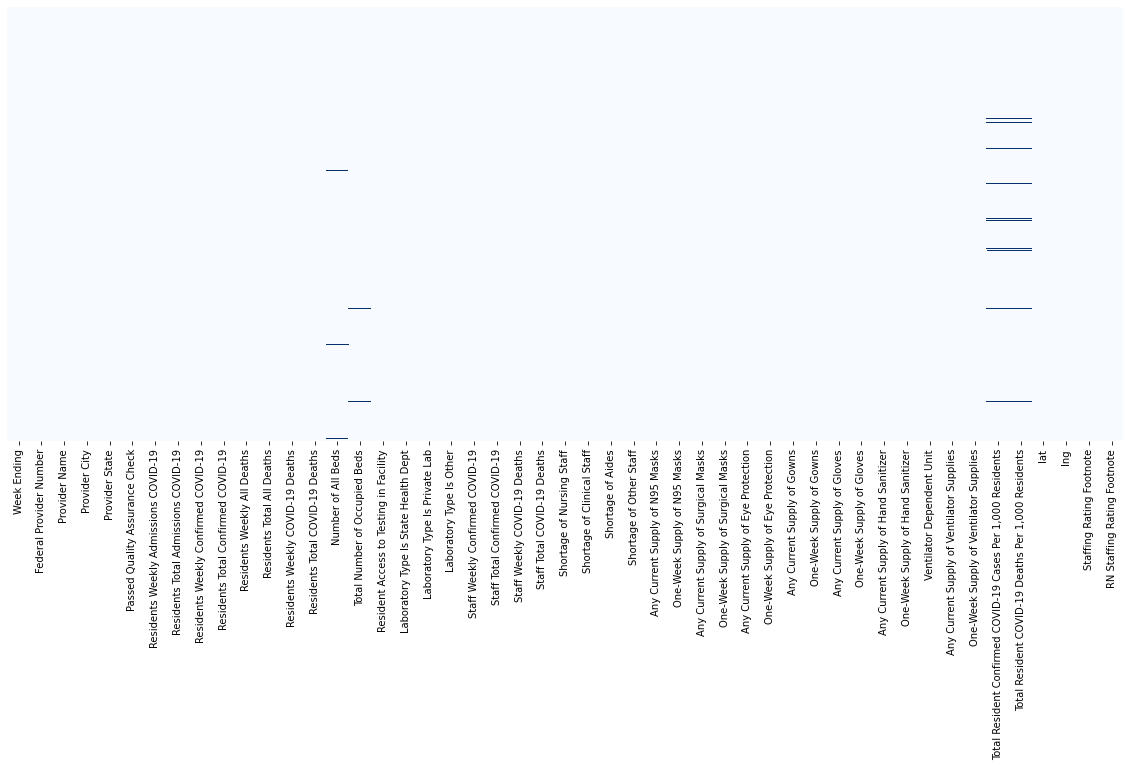

In [22]:
#Let's see where there is missing data and if it could be corrected
plt.figure(figsize=(20,8))
sns.heatmap(star_covid_data.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [23]:
#After analyzing the details, it is safe to use the average of each column for the corresponding features
star_covid_data['Number of All Beds'].fillna(round(star_covid_data['Number of All Beds'].mean(),1),inplace=True)
star_covid_data['Total Number of Occupied Beds'].fillna(round(star_covid_data['Total Number of Occupied Beds'].mean(),1),inplace=True)
star_covid_data['Total Resident Confirmed COVID-19 Cases Per 1,000 Residents'].fillna(round(star_covid_data['Total Resident Confirmed COVID-19 Cases Per 1,000 Residents'].mean(),1),inplace=True)
star_covid_data['Total Resident COVID-19 Deaths Per 1,000 Residents'].fillna(round(star_covid_data['Total Resident COVID-19 Deaths Per 1,000 Residents'].mean(),1),inplace=True)
#Let's also remove the small amount of Staffing Rating Footnote and RN Staffing Rating Footnote data
star_covid_data = star_covid_data[star_covid_data['Staffing Rating Footnote'].notnull()]

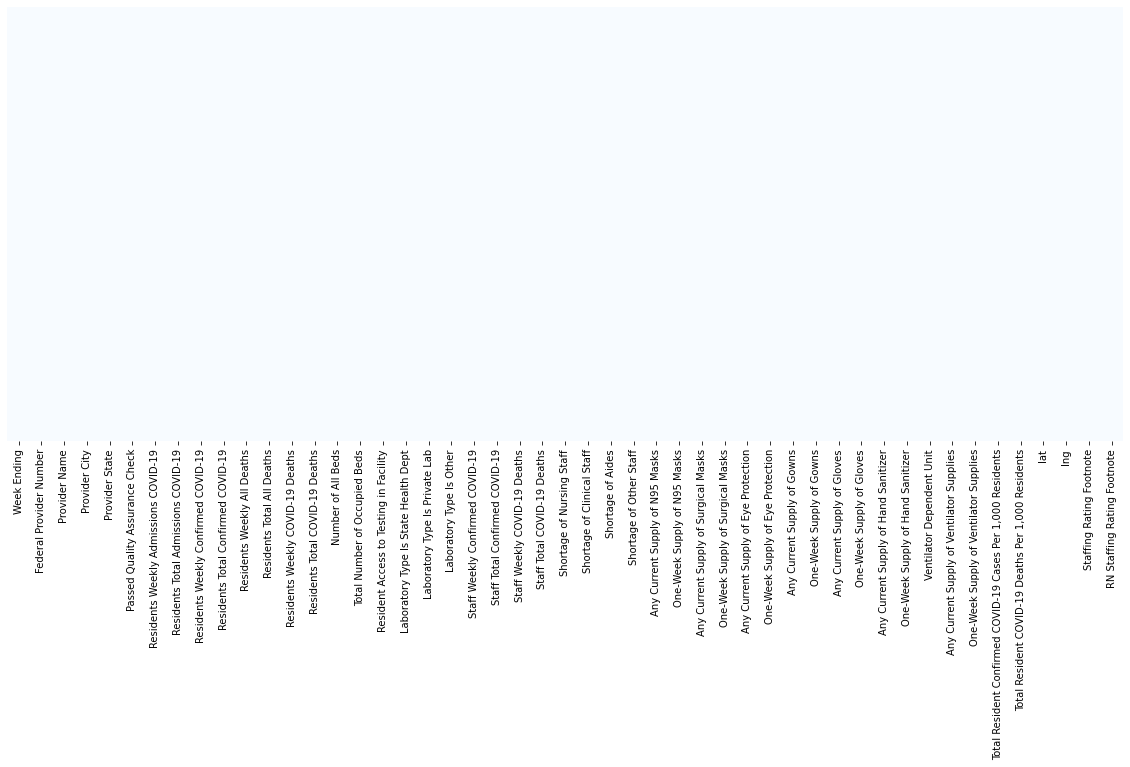

In [24]:
#Let's see how many are still remaining empty...
plt.figure(figsize=(20,8))
sns.heatmap(star_covid_data.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [25]:
#So now that no data was missing, let's take a look at our stats for our dataframe.
star_covid_data.describe()

Passed Quality Assurance Check  Residents Weekly Admissions COVID-19  \
count                     9902.000000                           9902.000000   
mean                         0.969804                              0.354979   
std                          0.171135                              2.206473   
min                          0.000000                              0.000000   
25%                          1.000000                              0.000000   
50%                          1.000000                              0.000000   
75%                          1.000000                              0.000000   
max                          1.000000                            104.000000   

       Residents Total Admissions COVID-19  \
count                          9902.000000   
mean                              2.233185   
std                               7.546714   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               1.000000   
max                             112.000000   

       Residents Weekly Confirmed COVID-19  \
count                          9902.000000   
mean                              0.696122   
std                               4.369055   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                             113.000000   

       Residents Total Confirmed COVID-19  Residents Weekly All Deaths  \
count                         9902.000000                  9902.000000   
mean                             4.497475                     0.628257   
std                             14.105993                     2.528229   
min                              0.000000                     0.000000   
25%                              0.000000                     0.000000   
50%                              0.000000                     0.000000   
75%                              1.000000                     0.000000   
max                            211.000000                    55.000000   

       Residents Total All Deaths  Residents Weekly COVID-19 Deaths  \
count                 9902.000000                        9902.00000   
mean                     4.073420                           0.19592   
std                      8.998275                           1.35699   
min                      0.000000                           0.00000   
25%                      0.000000                           0.00000   
50%                      1.000000                           0.00000   
75%                      4.000000                           0.00000   
max                    161.000000                          34.00000   

       Residents Total COVID-19 Deaths  Number of All Beds  ...  \
count                      9902.000000         9902.000000  ...   
mean                          1.301858           87.205958  ...   
std                           4.742993           49.545934  ...   
min                           0.000000            0.000000  ...   
25%                           0.000000           50.000000  ...   
50%                           0.000000           80.000000  ...   
75%                           0.000000          118.000000  ...   
max                          66.000000          404.000000  ...   

       One-Week Supply of Hand Sanitizer  Ventilator Dependent Unit  \
count                        9902.000000                9902.000000   
mean                            0.937891                   0.034639   
std                             0.241365                   0.182874   
min                             0.000000                   0.000000   
25%                             1.000000                   0.000000   
50%                             1.000000                   0.000000   
75%                             1.000000                 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120bcc8b0>,
      dtype=object)

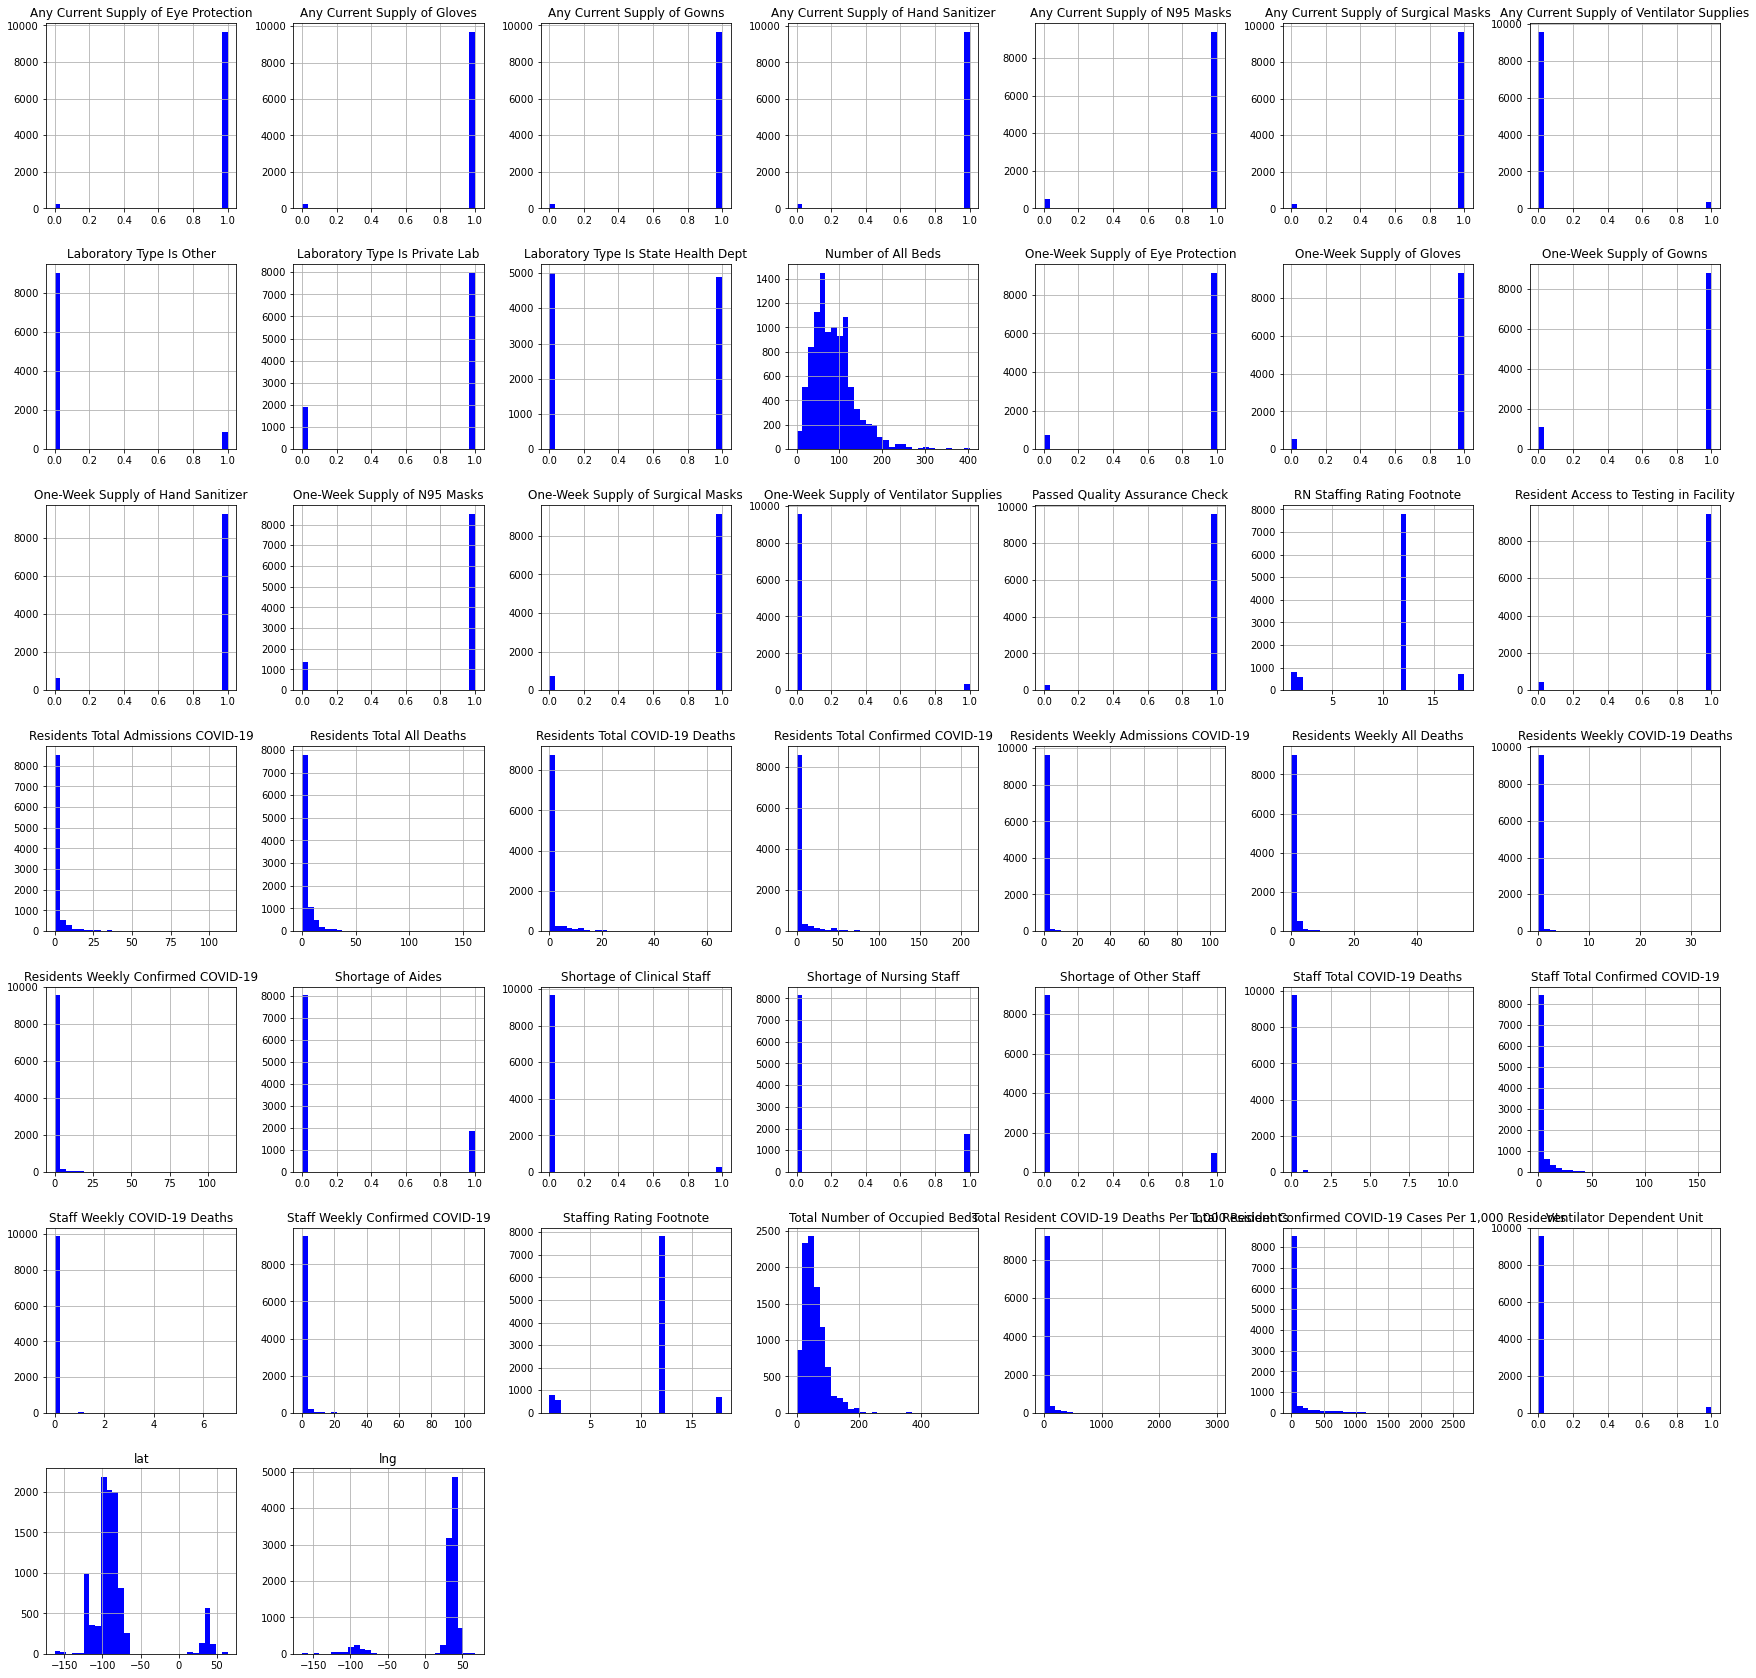

In [26]:
#Let's see some histograms for our dataset
star_covid_data.hist(bins=30,figsize=(30,30),color='b')

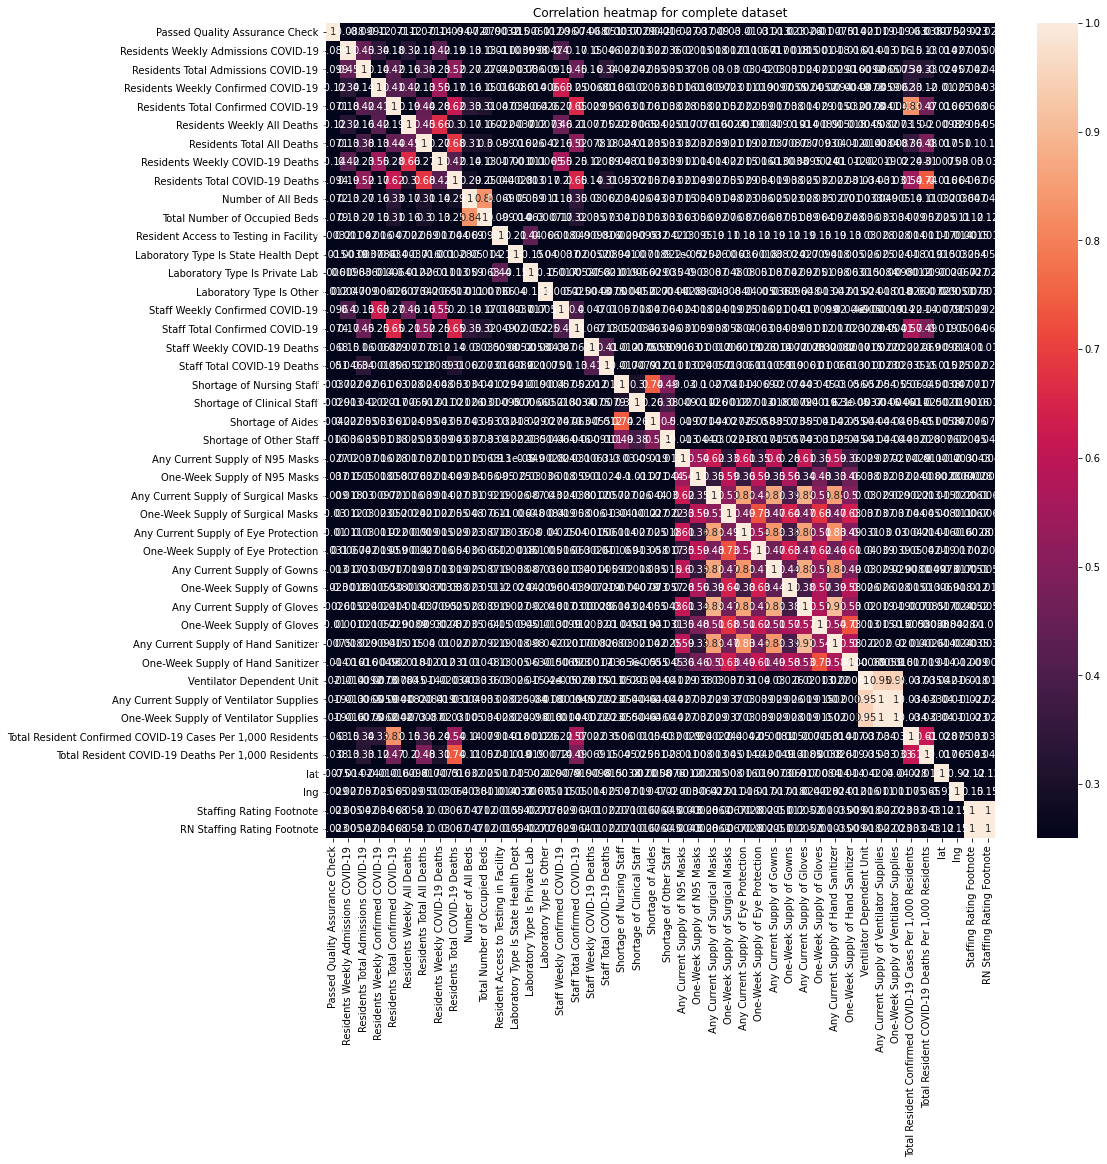

In [27]:
#Let's generate a correlation heat map with a threshold to see which are the most related attributes.
correlations = star_covid_data.corr()
f, ax = plt.subplots(figsize = (15,15))
plt.title('Correlation heatmap for complete dataset')
sns.heatmap(correlations, annot=True, vmin=0.25)

In [28]:
#Let's go in a little deeper and group by date as well as federal provider number
fpn_list = star_covid_data['Federal Provider Number'].drop_duplicates().reset_index(drop=True)
fpn_grp = star_covid_data.groupby('Federal Provider Number')
wk_list = star_covid_data['Week Ending'].drop_duplicates().sort_values().reset_index(drop=True)
wk_grp = star_covid_data.groupby('Week Ending')

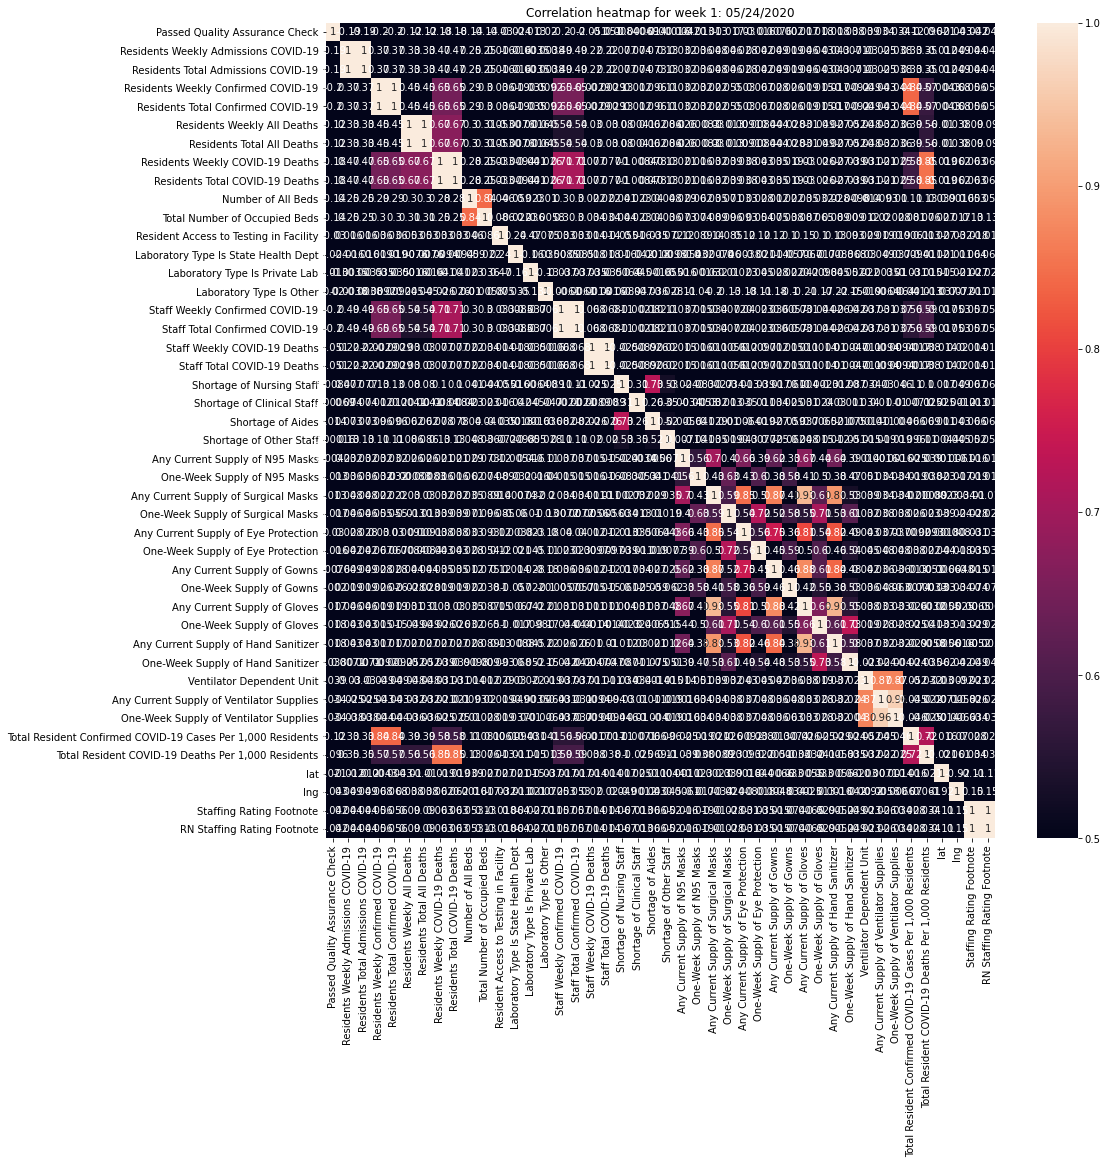

In [29]:
#Let's see how the correlations change from week to week for this dataset
correlation_test = wk_grp.get_group(wk_list[0]).corr()
g, bx = plt.subplots(figsize=(15,15))
plt.title('Correlation heatmap for week 1: ' + str(wk_list[0]))
sns.heatmap(correlation_test,annot=True,vmin=0.5)

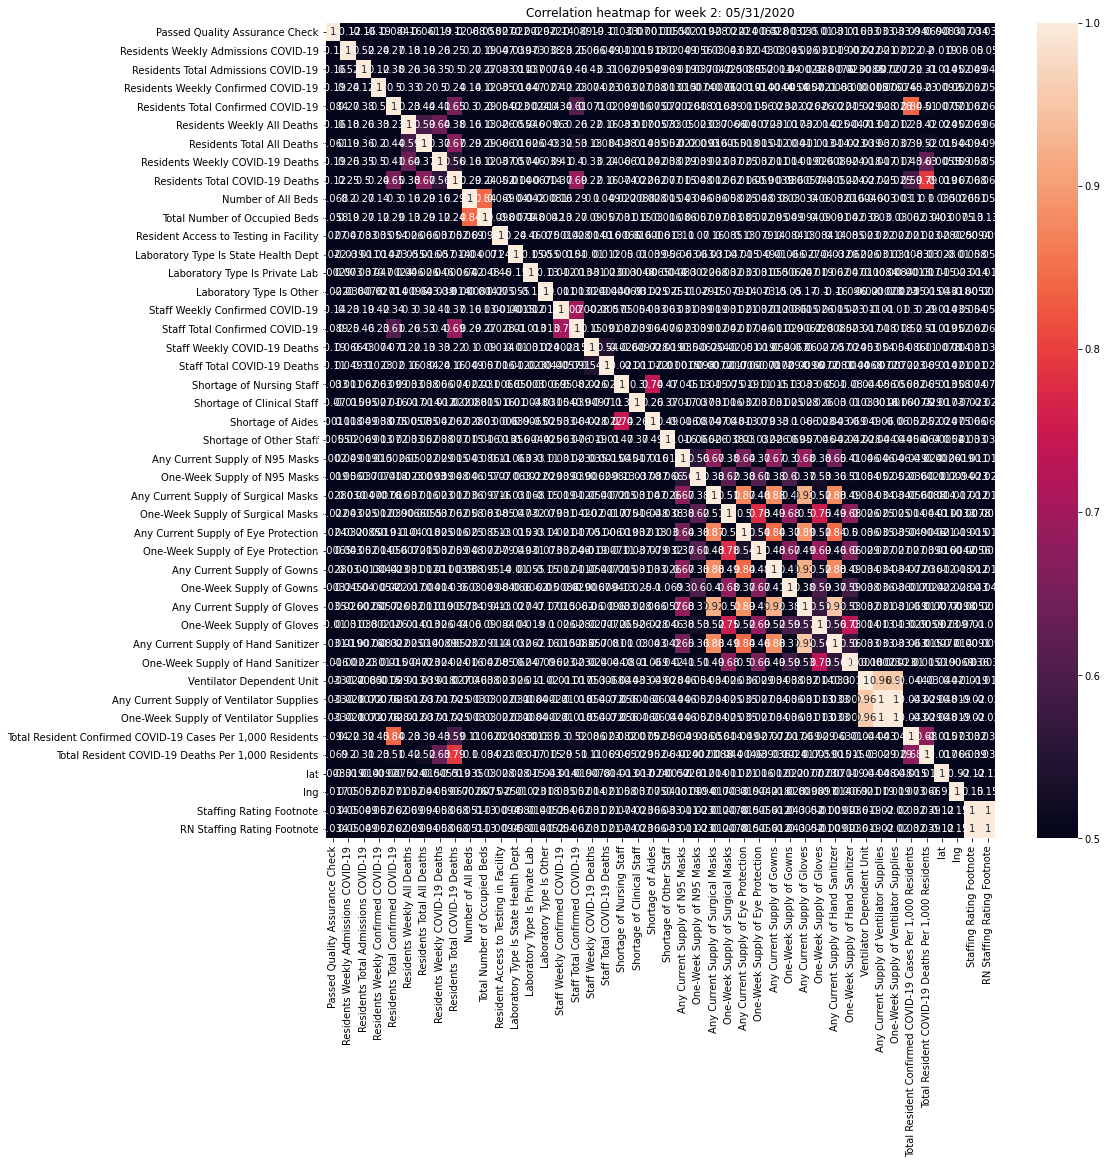

In [30]:
correlation_test = wk_grp.get_group(wk_list[1]).corr()
g, bx = plt.subplots(figsize=(15,15))
plt.title('Correlation heatmap for week 2: ' + str(wk_list[1]))
sns.heatmap(correlation_test,annot=True,vmin=0.5)

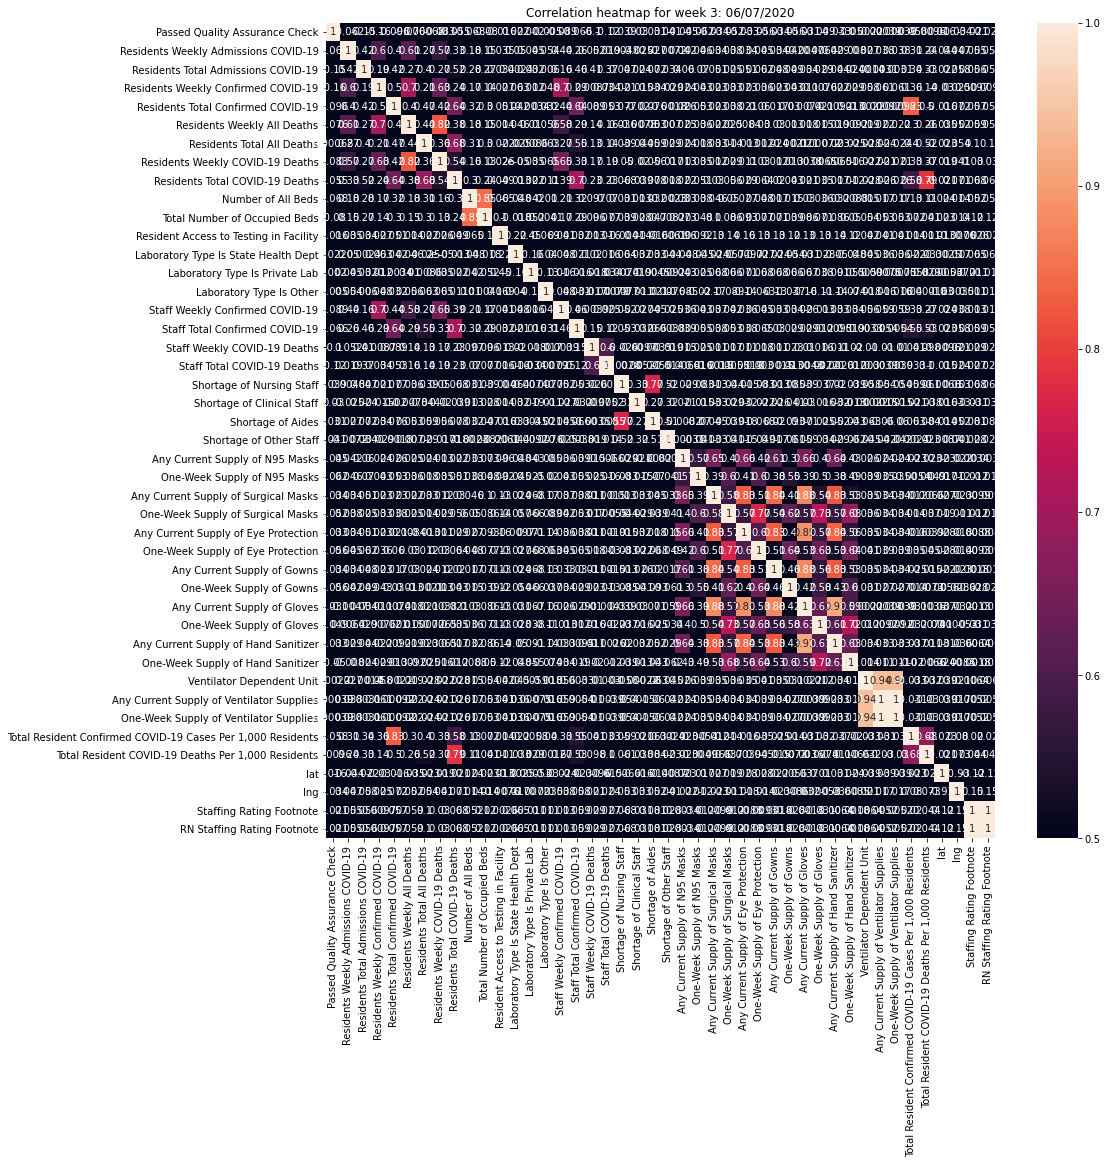

In [31]:
correlation_test = wk_grp.get_group(wk_list[2]).corr()
g, bx = plt.subplots(figsize=(15,15))
plt.title('Correlation heatmap for week 3: ' + str(wk_list[2]))
sns.heatmap(correlation_test,annot=True,vmin=0.5)

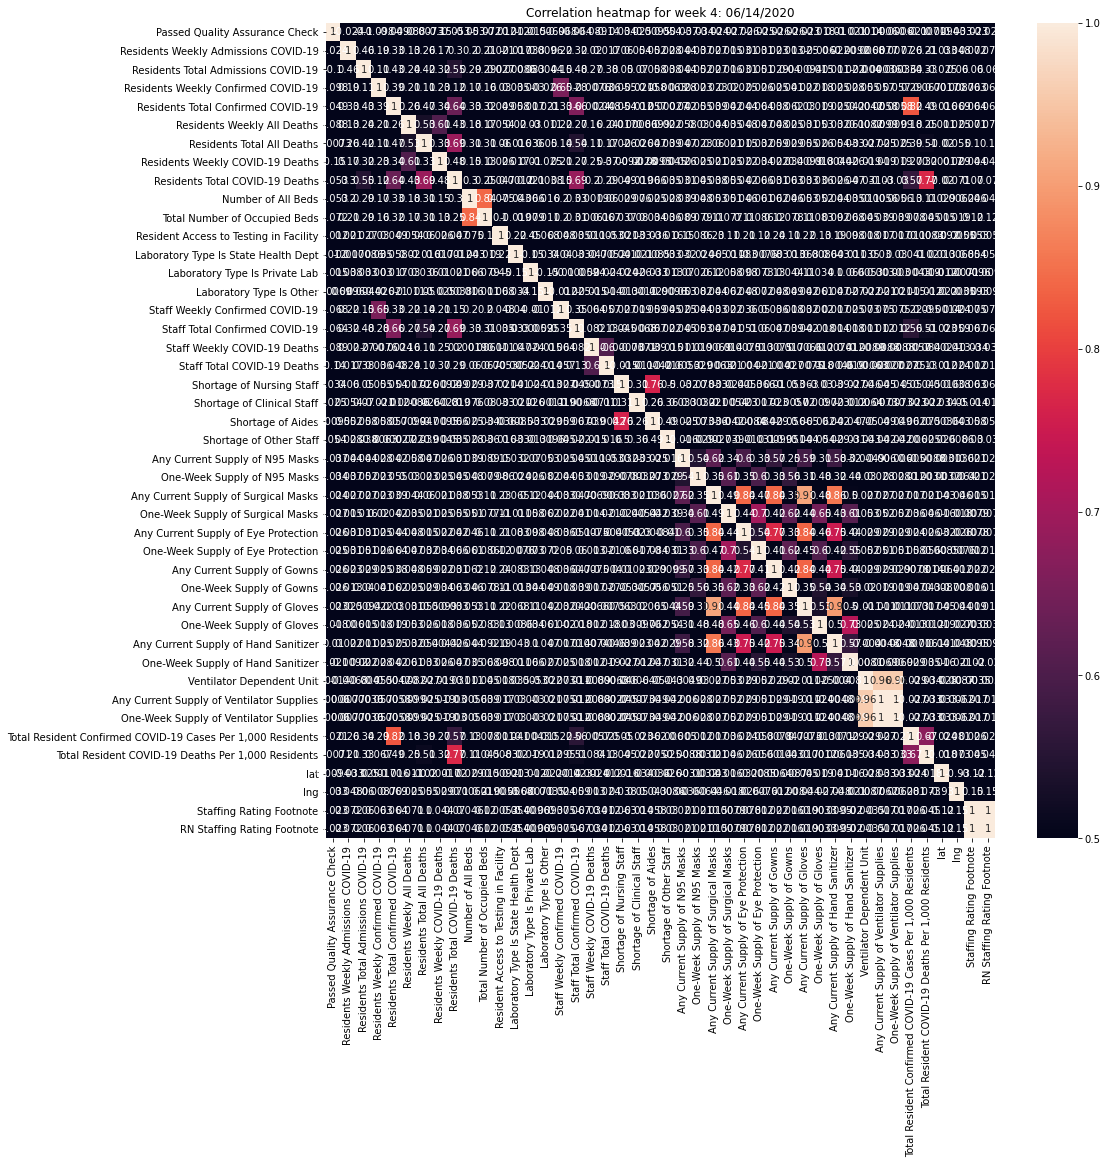

In [32]:
correlation_test = wk_grp.get_group(wk_list[3]).corr()
g, bx = plt.subplots(figsize=(15,15))
plt.title('Correlation heatmap for week 4: ' + str(wk_list[3]))
sns.heatmap(correlation_test,annot=True,vmin=0.5)

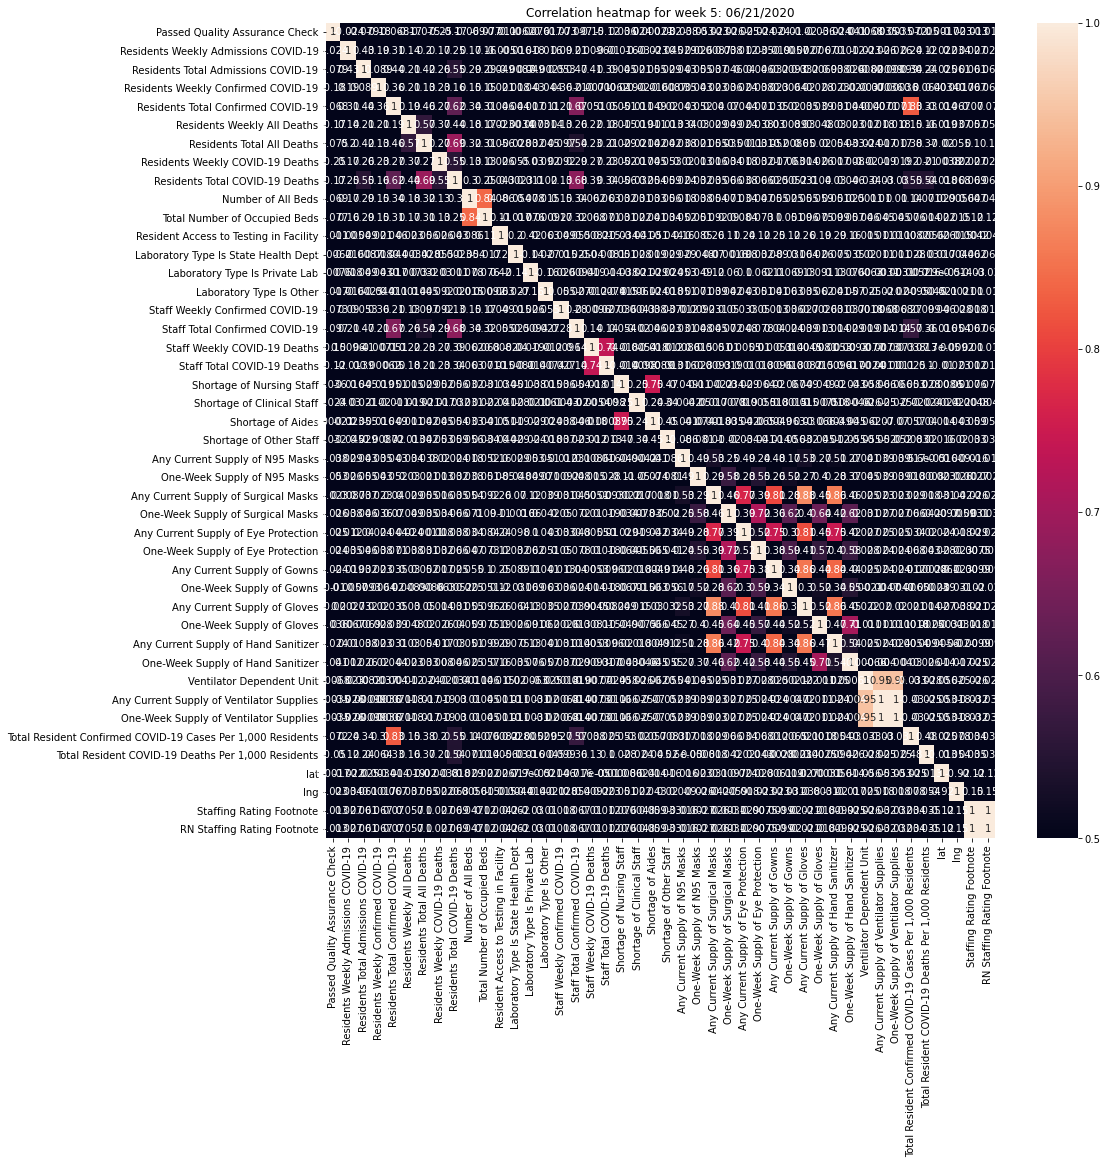

In [33]:
correlation_test = wk_grp.get_group(wk_list[4]).corr()
g, bx = plt.subplots(figsize=(15,15))
plt.title('Correlation heatmap for week 5: ' + str(wk_list[4]))
sns.heatmap(correlation_test,annot=True,vmin=0.5)

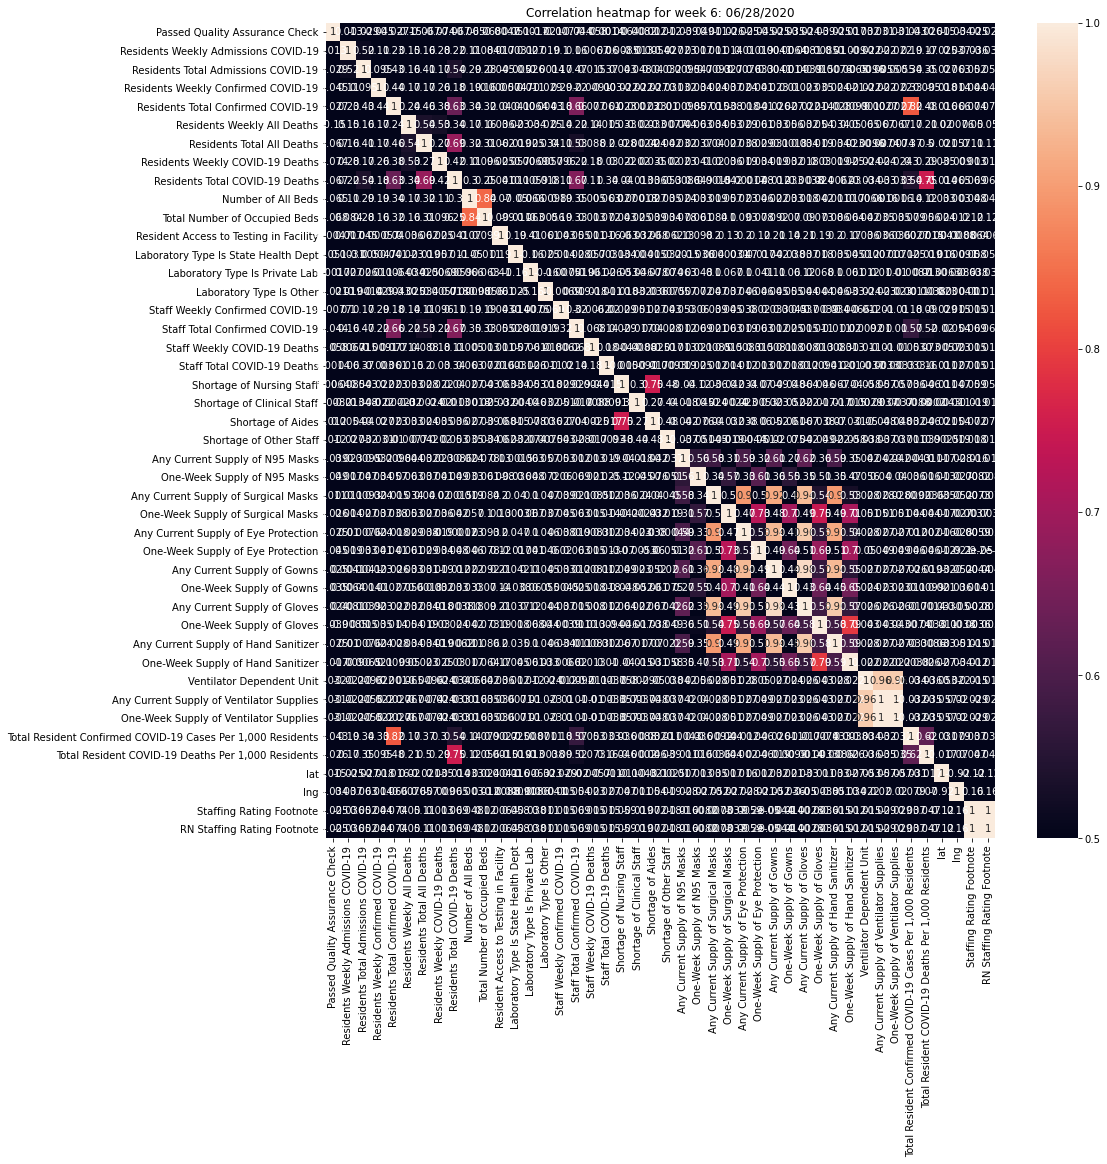

In [34]:
correlation_test = wk_grp.get_group(wk_list[5]).corr()
g, bx = plt.subplots(figsize=(15,15))
plt.title('Correlation heatmap for week 6: ' + str(wk_list[5]))
sns.heatmap(correlation_test,annot=True,vmin=0.5)

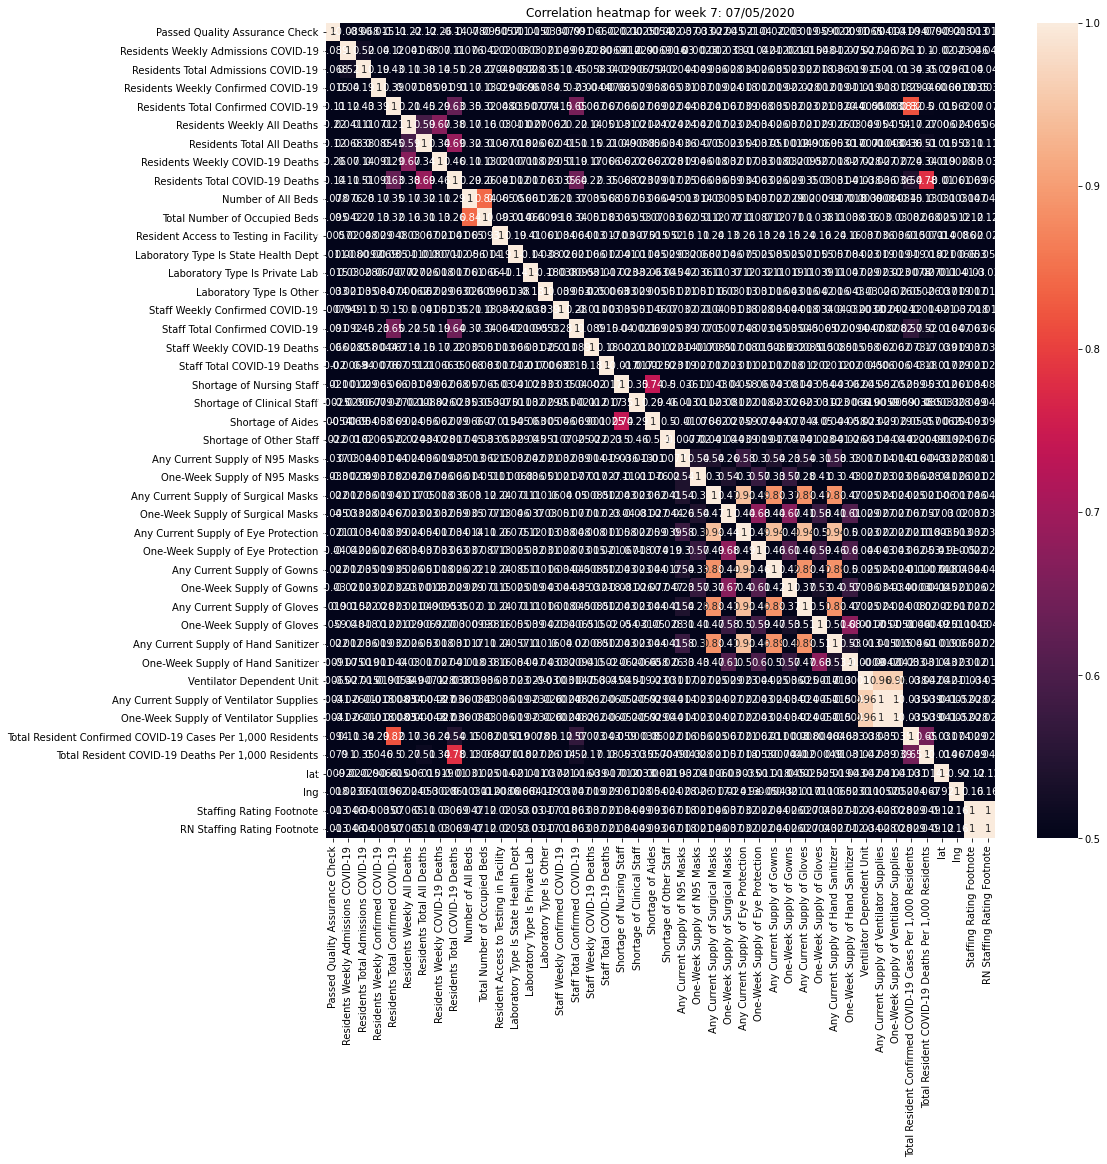

In [35]:
correlation_test = wk_grp.get_group(wk_list[6]).corr()
g, bx = plt.subplots(figsize=(15,15))
plt.title('Correlation heatmap for week 7: ' + str(wk_list[6]))
sns.heatmap(correlation_test,annot=True,vmin=0.5)

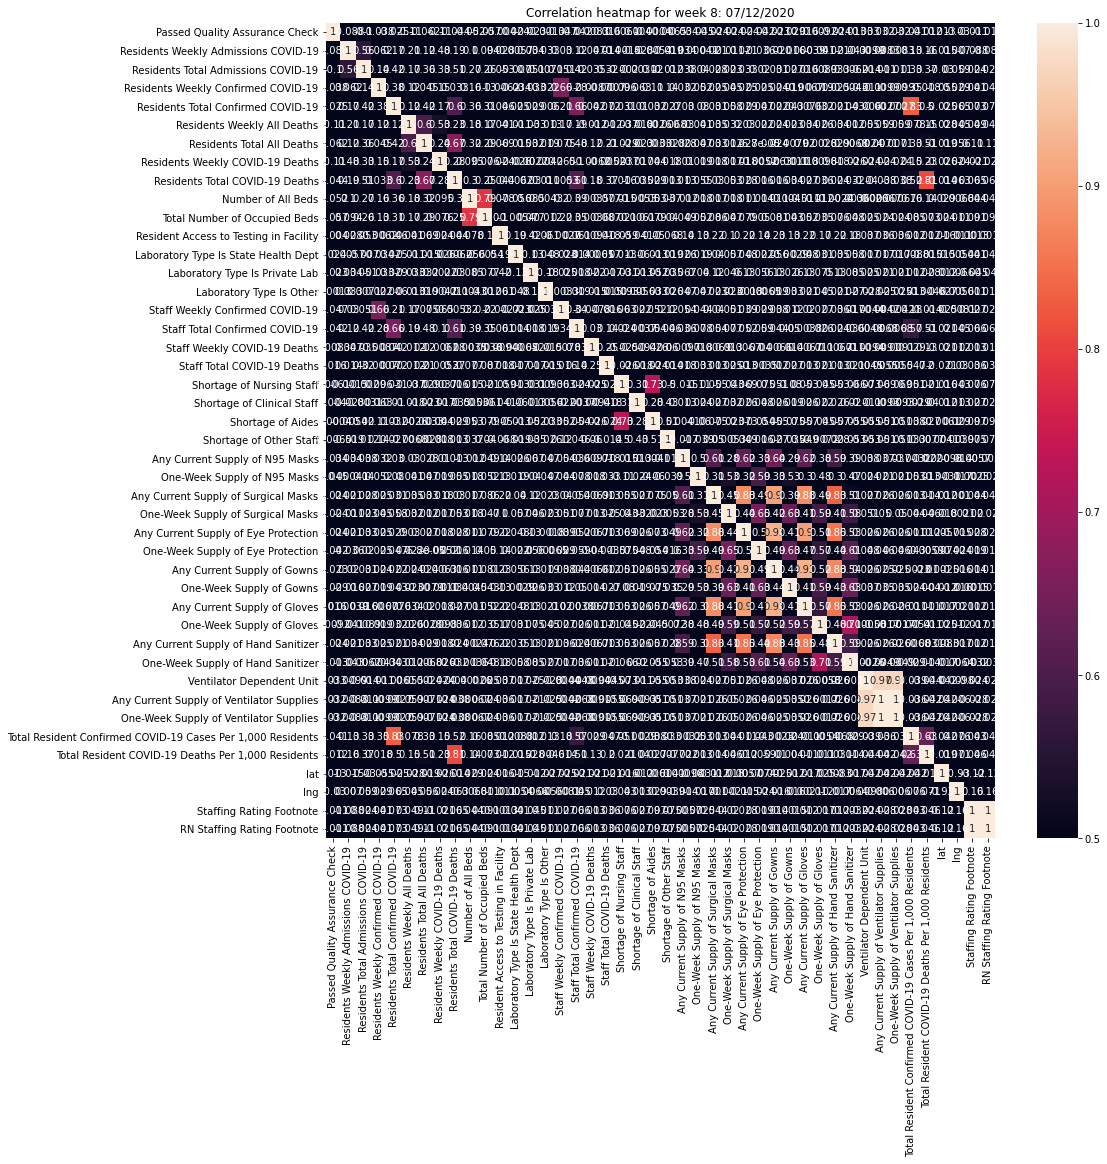

In [36]:
correlation_test = wk_grp.get_group(wk_list[7]).corr()
g, bx = plt.subplots(figsize=(15,15))
plt.title('Correlation heatmap for week 8: ' + str(wk_list[7]))
sns.heatmap(correlation_test,annot=True,vmin=0.5)

As a whole, we can see that there isn't much change from the main correlation heatmap, with the exceptions of a few features. Equipment, beds and supplies having the most correlation of all throughout each week and in the overall dataset, these are the ones that can be said to occupy the priority in each of the corresponding insititutions. 

Next, a further look into specific feature I thought would be significant will be taken into further detail to see how they each perform in a high quality vs. low quality setting according to this dataset's classification.

Text(0, 0.5, 'Residents Total Confirmed COVID-19')

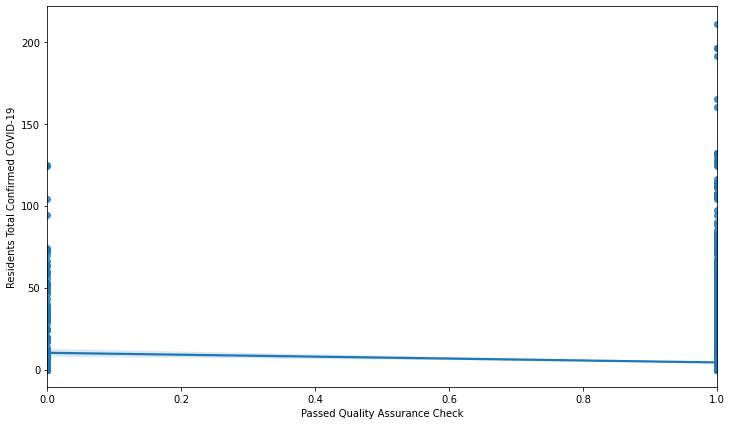

In [37]:
#Do passing institutions tend to have less resident infections? - Let's see the correlation
plt.figure(figsize=[12,7])
sns.regplot(star_covid_data['Passed Quality Assurance Check'], star_covid_data['Residents Total Confirmed COVID-19'])
plt.xlabel('Passed Quality Assurance Check')
plt.ylabel('Residents Total Confirmed COVID-19')

In [38]:
avgval_wk_rescovidmax = []
avgval_wk_rescovid = []
for l in range(len(wk_list)):
    avgval_wk_rescovidmax.append(wk_grp.get_group(wk_list[l])[wk_grp.get_group(wk_list[l])['Passed Quality Assurance Check'] == wk_grp.get_group(wk_list[l])['Passed Quality Assurance Check'].max()]['Residents Total Confirmed COVID-19'].mean())
    avgval_wk_rescovid.append(wk_grp.get_group(wk_list[l])[wk_grp.get_group(wk_list[l])['Passed Quality Assurance Check'] != wk_grp.get_group(wk_list[l])['Passed Quality Assurance Check'].max()]['Residents Total Confirmed COVID-19'].mean())

Text(0, 0.5, 'Residents Total Confirmed COVID-19')

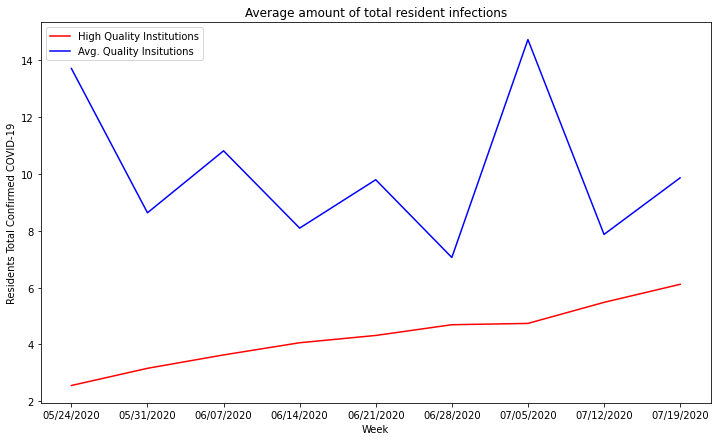

In [39]:
#Now let's see on average how each high and low quality perform on resident infections.
fig, ax = plt.subplots(figsize=[12,7])
ax.plot(wk_list, avgval_wk_rescovidmax, color = 'r', label = 'High Quality Institutions')
ax.plot(wk_list,  avgval_wk_rescovid, color='b', label = 'Avg. Quality Insitutions')
ax.legend(loc='upper left')
plt.title('Average amount of total resident infections')
plt.xlabel('Week')
plt.ylabel('Residents Total Confirmed COVID-19')

Text(0, 0.5, 'Number of All Beds')

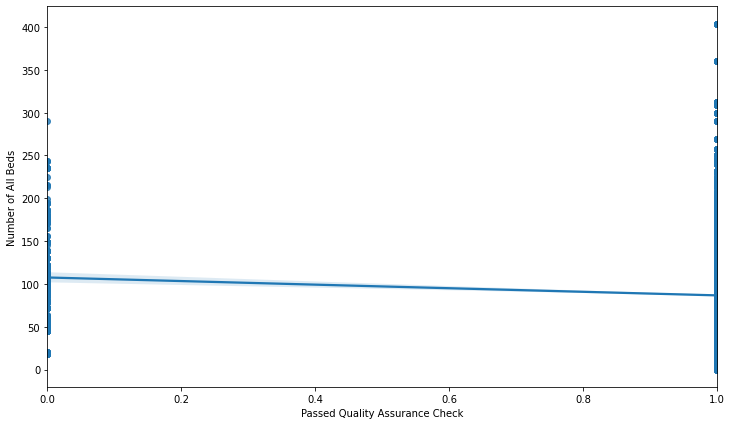

In [40]:
#Do passing institutions tend to have more beds available? - Let's see the correlation.
plt.figure(figsize=[12,7])
sns.regplot(star_covid_data['Passed Quality Assurance Check'], star_covid_data['Number of All Beds'])
plt.xlabel('Passed Quality Assurance Check')
plt.ylabel('Number of All Beds')

In [41]:
avgval_wk_bedsmax = []
avgval_wk_beds = []
for l in range(len(wk_list)):
    avgval_wk_bedsmax.append(wk_grp.get_group(wk_list[l])[wk_grp.get_group(wk_list[l])['Passed Quality Assurance Check'] == wk_grp.get_group(wk_list[l])['Passed Quality Assurance Check'].max()]['Number of All Beds'].mean())
    avgval_wk_beds.append(wk_grp.get_group(wk_list[l])[wk_grp.get_group(wk_list[l])['Passed Quality Assurance Check'] != wk_grp.get_group(wk_list[l])['Passed Quality Assurance Check'].max()]['Number of All Beds'].mean())

Text(0, 0.5, 'Number of All Beds')

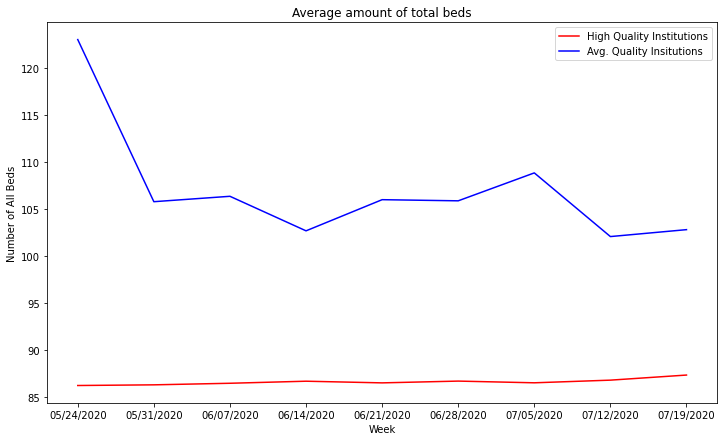

In [42]:
#Now let's see how each high and low quality perform on average with respect to total beds.
fig, ax = plt.subplots(figsize=[12,7])
ax.plot(wk_list, avgval_wk_bedsmax, color = 'r', label = 'High Quality Institutions')
ax.plot(wk_list,  avgval_wk_beds, color='b', label = 'Avg. Quality Insitutions')
ax.legend(loc='upper right')
plt.title('Average amount of total beds')
plt.xlabel('Week')
plt.ylabel('Number of All Beds')

Text(0, 0.5, 'Residents Total COVID-19 Deaths')

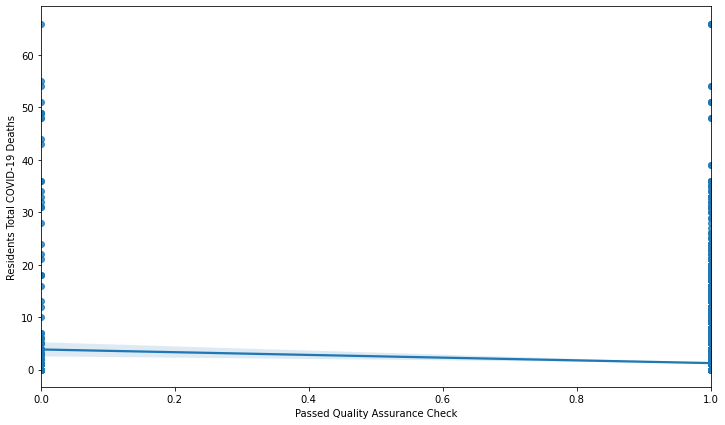

In [43]:
#Do passing institutions tend to have less resident deaths? - Let's see the correlation
plt.figure(figsize=[12,7])
sns.regplot(star_covid_data['Passed Quality Assurance Check'],star_covid_data['Residents Total COVID-19 Deaths'])
plt.xlabel('Passed Quality Assurance Check')
plt.ylabel('Residents Total COVID-19 Deaths')

In [44]:
avgval_wk_deathmax = []
avgval_wk_death = []
for l in range(len(wk_list)):
    avgval_wk_deathmax.append(wk_grp.get_group(wk_list[l])[wk_grp.get_group(wk_list[l])['Passed Quality Assurance Check'] == wk_grp.get_group(wk_list[l])['Passed Quality Assurance Check'].max()]['Residents Total COVID-19 Deaths'].mean())
    avgval_wk_death.append(wk_grp.get_group(wk_list[l])[wk_grp.get_group(wk_list[l])['Passed Quality Assurance Check'] != wk_grp.get_group(wk_list[l])['Passed Quality Assurance Check'].max()]['Residents Total COVID-19 Deaths'].mean())
    

Text(0, 0.5, 'Residents Total COVID-19 Deaths')

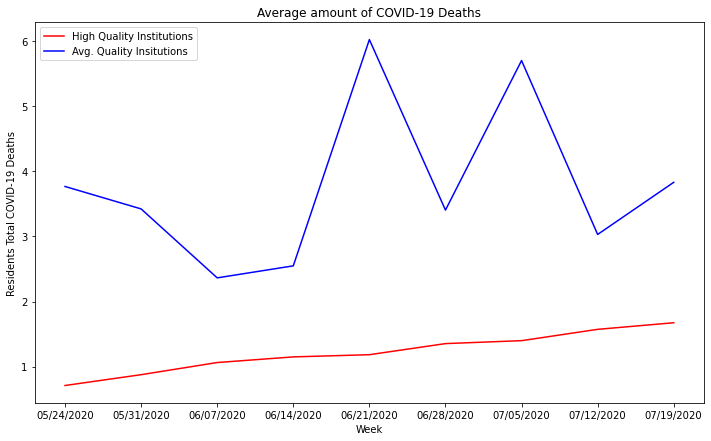

In [45]:
#Now let's see how each high and low quality perform on average with respect to amount of COVID-19 related deaths.
fig, ax = plt.subplots(figsize=[12,7])
ax.plot(wk_list, avgval_wk_deathmax, color = 'r', label = 'High Quality Institutions')
ax.plot(wk_list,  avgval_wk_death, color='b', label = 'Avg. Quality Insitutions')
ax.legend(loc='upper left')
plt.title('Average amount of COVID-19 Deaths')
plt.xlabel('Week')
plt.ylabel('Residents Total COVID-19 Deaths')

As we can see, the features taken into consideration here seem to make sense when it comes to death and infections. What is interesting to see is the fact that there are less beds on average in a high quality institution as opposed to a low quality insititution, this may indicate many things, like the fact that they don't receive as many patients as low quality insitutions, etc. Nonetheless, overall these trend lines make sense for a dataset like this and now we move to further analysis - map visualization of locations.

-------------------------------------------------------------------------------------------------------------------

So far so good, we have been able to see some correlations and behaviors of the features in this dataset.
For this next part, I want to give a perspective of where these are located. 
This is why earlier I used Google's Geocoding API, since we were missing some coordinate locations on some institutions, but now that we have them, we can see exactly where they are. 

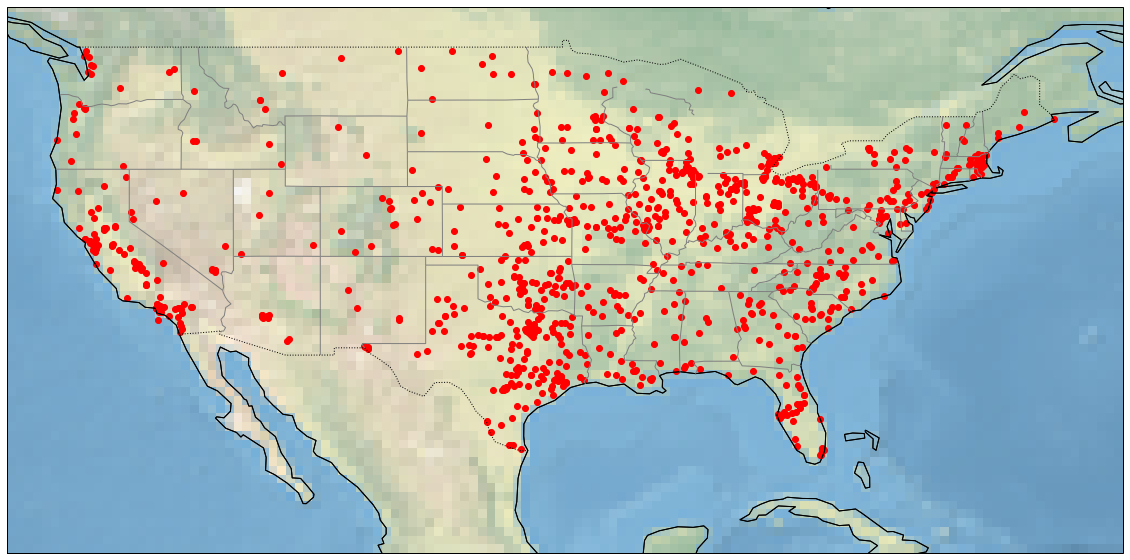

In [46]:
#Where are the institutions in this dataset located?
states_110m = cfeature.NaturalEarthFeature('cultural',
                                          'admin_1_states_provinces_lines',
                                          '110m',
                                          edgecolor='gray',
                                          facecolor='none')

fig = plt.figure(figsize=(20,20))
bx = fig.add_subplot(1,1,1,projection = ccrs.PlateCarree())
bx.set_extent([-127,-63,20,47])
bx.stock_img()
bx.coastlines()
bx.add_feature(cfeature.LAND)
bx.add_feature(cfeature.OCEAN)
bx.add_feature(cfeature.COASTLINE)
bx.add_feature(cfeature.BORDERS, linestyle=':')
bx.add_feature(states_110m)

plt.scatter(x=star_covid_data.drop_duplicates(subset='Federal Provider Number').lat.reset_index(drop=True), 
            y=star_covid_data.drop_duplicates(subset='Federal Provider Number').lng.reset_index(drop=True),
            color='red',alpha=1,transform=ccrs.PlateCarree())

Seeing that this is a nice image of where the institutions are located, we can further improve this by aggregating by state and seeing the impact relative to each state. 

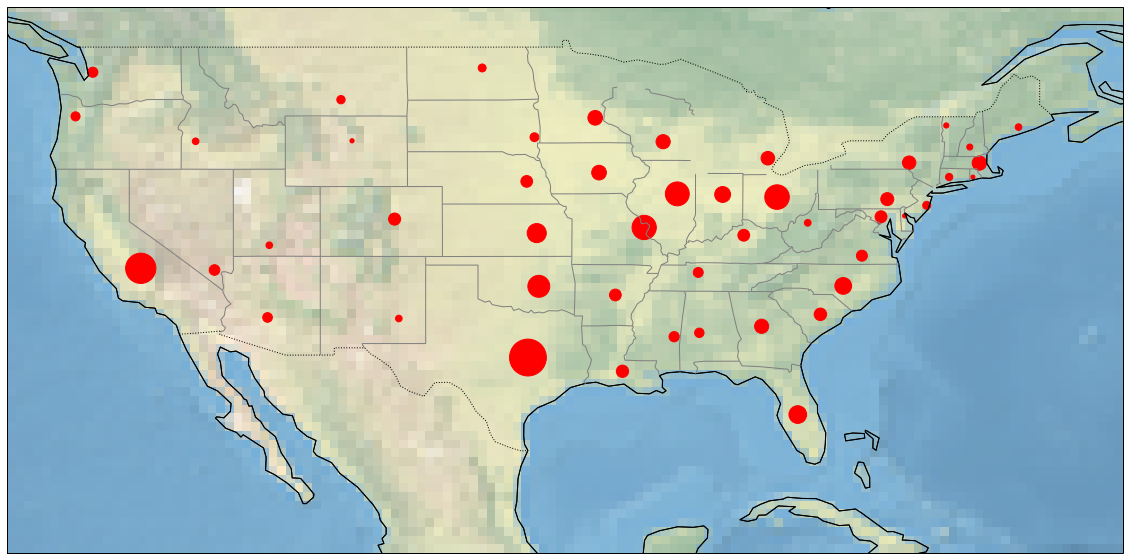

In [47]:
state_covid_lat = star_covid_data.groupby('Provider State').median()[['lat','lng']]

state_covid_inst = star_covid_data.groupby('Provider State').count()[['Federal Provider Number']].rename(columns={'Federal Provider Number':'inst_count'})

state_covid = state_covid_inst.join(state_covid_lat).reset_index(drop=True)

#Where are the institutions in this dataset located by state?
states_110m = cfeature.NaturalEarthFeature('cultural',
                                          'admin_1_states_provinces_lines',
                                          '110m',
                                          edgecolor='gray',
                                          facecolor='none')

fig = plt.figure(figsize=(20,20))
bx = fig.add_subplot(1,1,1,projection = ccrs.PlateCarree())
bx.set_extent([-127,-63,20,47])
bx.stock_img()
bx.coastlines()
bx.add_feature(cfeature.LAND)
bx.add_feature(cfeature.OCEAN)
bx.add_feature(cfeature.COASTLINE)
bx.add_feature(cfeature.BORDERS, linestyle=':')
bx.add_feature(states_110m)

plt.scatter(x=state_covid.lat, 
            y=state_covid.lng,
            s = state_covid.inst_count,color='red',alpha=1,transform=ccrs.PlateCarree())


As a final step in this analysis, I will perform a logistic regression to see whether this model can be used to give a prediction on what constitutes a high quality institution. 

In [48]:
#Let's perform a logistic regression to see if this model can be a good candidate to predict an institutions reputation
#First, transform to numpy arrays!
starcvd_ind = star_covid_data[['Residents Weekly Admissions COVID-19',
                'Residents Total Admissions COVID-19',
                'Residents Weekly Confirmed COVID-19',
                'Residents Total Confirmed COVID-19',
                'Residents Weekly All Deaths',
                'Residents Total All Deaths',
                'Residents Weekly COVID-19 Deaths',
                'Residents Total COVID-19 Deaths',
                'Number of All Beds',
                'Total Number of Occupied Beds',
                'Resident Access to Testing in Facility',
                'Laboratory Type Is State Health Dept',
                'Laboratory Type Is Private Lab',
                'Laboratory Type Is Other',
                'Staff Weekly Confirmed COVID-19',
                'Staff Total Confirmed COVID-19',
                'Staff Weekly COVID-19 Deaths',
                'Staff Total COVID-19 Deaths',
                'Shortage of Nursing Staff',
                'Shortage of Clinical Staff',
                'Shortage of Aides',
                'Shortage of Other Staff',
                'Any Current Supply of N95 Masks',
                'One-Week Supply of N95 Masks',
                'Any Current Supply of Surgical Masks',
                'One-Week Supply of Surgical Masks',
                'Any Current Supply of Eye Protection',
                'One-Week Supply of Eye Protection',
                'Any Current Supply of Gowns',
                'One-Week Supply of Gowns',
                'Any Current Supply of Gloves',
                'One-Week Supply of Gloves',
                'Any Current Supply of Hand Sanitizer',
                'One-Week Supply of Hand Sanitizer',
                'Ventilator Dependent Unit',
                'Any Current Supply of Ventilator Supplies',
                'One-Week Supply of Ventilator Supplies',
                'Total Resident Confirmed COVID-19 Cases Per 1,000 Residents',
                'Total Resident COVID-19 Deaths Per 1,000 Residents']]
true_starcvd_ind = starcvd_ind.values
true_starcvd_dep = star_covid_data['Passed Quality Assurance Check'].values
true_starcvd_dep

array([1, 1, 1, ..., 1, 1, 1])

In [49]:
#Now, we need to split the dataset into the training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(true_starcvd_ind,true_starcvd_dep,test_size = 0.2,random_state=0)

In [50]:
#As is by convention, let's scale our data in order to perform a model on it.
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [51]:
#When building this model, we need to create a logistic regression with hyperparameters to be used on the data.
model = LogisticRegression(solver='liblinear',C=0.001,multi_class='ovr',random_state = 30)

In [52]:
#Next, we perform the model on the data.
model.fit(x_train,y_train)

LogisticRegression(C=0.001, multi_class='ovr', random_state=30,
                   solver='liblinear')

In [53]:
#Once we have the model ready to go, 
#we need to validate it by seeing how it performs on the remaining data of the dataset.
#As we did earlier, we scale our data in order for it to be useful in this analysis.
x_test = scaler.fit_transform(x_test)

In [54]:
#We can use the predict function from the model in order to obtain a result as an array of responses.
y_pred = model.predict(x_test)

In [55]:
#Now we can see how well our model performed on the testing data and we can see that it did really well.
model.score(x_test,y_test)

0.9692074709742554

In [56]:
metrics.precision_score(y_test,y_pred)

0.9696663296258847

In [57]:
metrics.recall_score(y_test,y_pred)

0.9994788952579469

In [58]:
confusion_matrix(y_test,y_pred)

array([[   2,   60],
       [   1, 1918]])

So far so good again, but as we can see from the results, they show that this model seems to be overfitted. 
The next step to take is to perform a feature selection along with cross validation in order for the model to perform a little better, let's see what we get...

In [59]:
#For this part I will be using python's MLxtend library, 
#which enables us to perform both of these operations on the model.
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [60]:
model2 = LogisticRegression(solver='liblinear',C=0.001,multi_class='ovr',random_state = 0)

In [61]:
sfs_model = SFS(model2,
                k_features = 5,
                forward = True,
                floating = False,
                scoring = 'accuracy',
                verbose=2,
                cv = 6,
                n_jobs=-1
                )

In [62]:
sfs = sfs_model.fit(x_train,y_train,)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    5.2s finished

[2020-08-31 13:30:00] Features: 1/5 -- score: 0.9702058434458132[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.7s finished

[2020-08-31 13:30:00] Features: 2/5 -- score: 0.9702058434458132[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  37 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.8s finished

[2020-08-31 13:30:01] Features: 3/5 -- score: 0.9702058434458132[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.8s finished

[2020-08-31 13:30:02] Features: 4/5 -- score: 0.9702058434458132[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent work

In [63]:
#Using feature selection, 
#the following features/columns are the ones chosen as significant when determining a pass/fail in quality assurance.
for i in range(len(sfs.k_feature_idx_)):
    print(starcvd_ind.columns[i])

Residents Weekly Admissions COVID-19
Residents Total Admissions COVID-19
Residents Weekly Confirmed COVID-19
Residents Total Confirmed COVID-19
Residents Weekly All Deaths


In [64]:
#The indexes of these columns can likewise be determined to be:
fcols = list(sfs.k_feature_idx_)
fcols
#These will be saved for further analysis later on.

[0, 1, 3, 5, 7]

In [65]:
#We can get further metrics for each with the following:
display(pd.DataFrame(sfs.get_metric_dict()))

1  \
feature_idx                                                 (0,)   
cv_scores      [0.9697199091597275, 0.9704545454545455, 0.970...   
avg_score                                               0.970206   
feature_names                                               (0,)   
ci_bound                                              0.00038495   
std_dev                                               0.00035178   
std_err                                              0.000157321   

                                                               2  \
feature_idx                                               (0, 1)   
cv_scores      [0.9697199091597275, 0.9704545454545455, 0.970...   
avg_score                                               0.970206   
feature_names                                             (0, 1)   
ci_bound                                              0.00038495   
std_dev                                               0.00035178   
std_err                                              0.000157321   

                                                               3  \
feature_idx                                            (0, 1, 3)   
cv_scores      [0.9697199091597275, 0.9704545454545455, 0.970...   
avg_score                                               0.970206   
feature_names                                          (0, 1, 3)   
ci_bound                                              0.00038495   
std_dev                                               0.00035178   
std_err                                              0.000157321   

                                                               4  \
feature_idx                                         (0, 1, 3, 5)   
cv_scores      [0.9697199091597275, 0.9704545454545455, 0.970...   
avg_score                                               0.970206   
feature_names                                       (0, 1, 3, 5)   
ci_bound                                              0.00038495   
std_dev                                               0.00035178   
std_err                                              0.000157321   

                                                               5  
feature_idx                                      (0, 1, 3, 5, 7)  
cv_scores      [0.9697199091597275, 0.9704545454545455, 0.970...  
avg_score                                               0.970206  
feature_names                                    (0, 1, 3, 5, 7)  
ci_bound                                              0.00038495  
std_dev                                               0.00035178  
std_err                                              0.000157321

In [66]:
#If we see the prediction score, this has gone up, 
#so some further steps need to be taken in order for the output to be correct.
sfs.k_score_

0.9702058434458132

Since we had overfitting, let's try again with the selected features from passing the model from the sequential feature selector


In [67]:
#Like earlier, let's generate a logistic regression with hyperparameters.
feat_model = LogisticRegression(solver='liblinear',C=0.001,multi_class='ovr',random_state = 0)

In [68]:
#Fit the model again, but this time with the features selected above.
feat_model.fit(x_train[:,fcols],y_train)

LogisticRegression(C=0.001, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [69]:
#Seeing once again the prediction score, we can see that it is lower,
#which does contribute to our overfitting.
metrics.accuracy_score(y_test,feat_model.predict(x_test[:,fcols]))

0.9687026754164564

In [70]:
#Likewise for the precision score.
metrics.precision_score(y_test,feat_model.predict(x_test[:,fcols]))

0.9687026754164564

In [71]:
#For recall though, we can see that there is an increase to perfection.
metrics.recall_score(y_test,feat_model.predict(x_test[:,fcols]))

1.0

In [72]:
#And seeing the confusion matrix once more, we get: 
confusion_matrix(y_test,feat_model.predict(x_test[:,fcols]))

array([[   0,   62],
       [   0, 1919]])

In summary, this was an overall analysis on the two datasets sent in as a question to see how the features were correlated with a further step in a location visualization as well as a logistic regression. 

The ending metrics were still not convincing, as there is still some indication of perfection or close to perfection when predicting the performance of my model, but this can also likely be due to the size of the dataset that I am dealing with.

Any snippets of this notebook can be taken for any analysis you may be doing, this was done to demonstrate any skillsets that could benefit either people or potential future employers. 